### **ABSTRACT**

Stroke is a medical disorder in which the blood arteries in the brain are ruptured, causing damage to the brain. When the supply of blood and other nutrients to the brain is interrupted, symptoms might develop. According to the World Health Organization (WHO), stroke is the greatest cause of death and disability globally. Early recognition of the various warning signs of a stroke can help reduce the severity of the stroke.

Stroke occurs when the blood flow to various areas of the brain is disrupted or diminished, resulting in the cells in those areas of the brain not receiving the nutrients and oxygen they require and dying. A stroke is a medical emergency that requires urgent medical attention. Early detection and appropriate management are required to prevent further damage to the affected area of the brain and other complications in other parts of the body.

The World Health Organization (WHO) estimates that 15 million people worldwide suffer from strokes each year, with one person dying every 4-5 minutes in the affected population. Stroke is the 16 leading cause of mortality in the United States according to the Centers for Disease Control and Prevention (CDC) [1]. Stroke is a noncommunicable disease that kills approximately 11% of the population.

In this project, I am working on stroke dataset. Here AutoMLH20 and Logistic Regression library is used for analysis. 

Source- https://pubmed.ncbi.nlm.nih.gov/34868531/




### **OBJECTIVE**


Determine what makes a person at risk for stroke.

Create a machine learning model to perform early detection of stroke for patients.

In [791]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install seaborn
!pip install statsmodels

In [792]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [793]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [794]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [795]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


In [796]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:23998 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpewjxl2s0
  JVM stdout: /tmp/tmpewjxl2s0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpewjxl2s0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:23998
Connecting to H2O server at http://127.0.0.1:23998 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_7i5wyw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [797]:
#For H2O
url = "https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [798]:
#For Pandas
df_pd=pd.read_csv('https://github.com/trivedi-mi/DataScience/raw/master/healthcare-dataset-stroke-data.csv')
df_pd.head()
df_pd_org=df_pd.copy()

In [799]:
#First five rows
df_pd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [800]:
#Get Stats of all the columns
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [801]:
#Description of all the columns 
df_pd.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


 From the table above, we can see there are some missing vales for BMI

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between Age and Stroke')

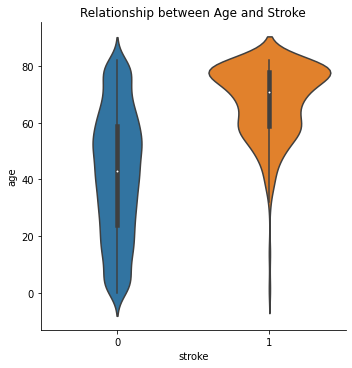

In [802]:
#Relation between age and stroke
sns.catplot('stroke','age',data=df_pd_org,kind='violin')
plt.title('Relationship between Age and Stroke')

 From the diagram above, we can see age is an important factor in predicting stroke. With the increase in age, the changes of stroke increases

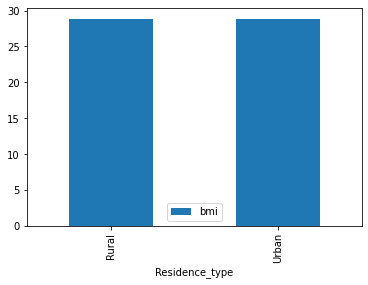

In [803]:
df_pd_org[['Residence_type','bmi']].groupby('Residence_type').mean('bmi').plot(kind='bar') # Relation residence type and BMI


 BMI is not varying for Rural and Urban

Text(0.5, 1.0, 'Relationship between glucose level and work type')

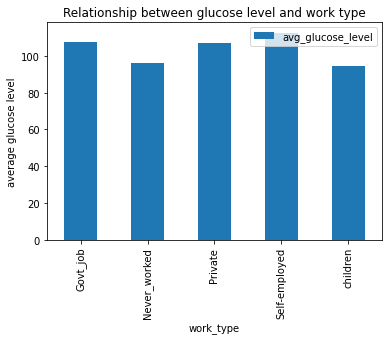

In [804]:
df_pd_org[['work_type','avg_glucose_level']].groupby('work_type').mean('avg_glucose_level').plot(kind='bar')
plt.ylabel('average glucose level')
plt.title('Relationship between glucose level and work type')

No significant result found


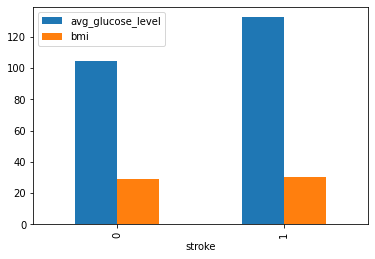

In [805]:
# Relation for stroke with bmi and average
df_pd_org[['stroke','avg_glucose_level','bmi']].groupby('stroke').mean(['bmi','avg_glucose_level']).plot(kind='bar')

It seems BMI not playing a great role in heart prediction. But we won't ignore it for now


Text(0.5, 1.1, 'Chance of Getting Stroke Based on Smoking Behavior')

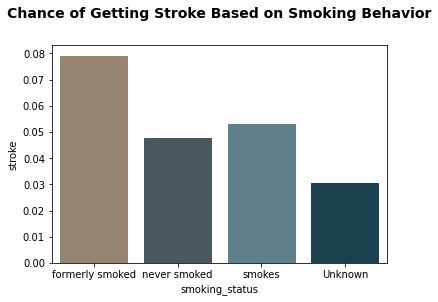

In [806]:
palettes = ['#9B856A', '#475962', '#598392', '#124559', '#540B0E']
ax = sns.barplot(data=df_pd_org, x='smoking_status', y='stroke',
            palette=palettes, edgecolor=palettes, ci=None)

ax.set_title('Chance of Getting Stroke Based on Smoking Behavior', y=1.1, weight='bold', fontsize=14)

One who smokes or has formerly smoked may have a higher risk of stroke

In [807]:
#Find the correlation
corr_matrix = df_pd_org.corr()
corr_matrix


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [808]:
 # Find how much each attribue correlates to Stroke
 corr_matrix["stroke"].sort_values(ascending=False)


stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
id                   0.006388
Name: stroke, dtype: float64

Age, heart_disease. glucose level and hypertension may play a significant role in stroke prediction

In [809]:
df_pd.dropna(inplace=True) # vif can't be calculated with nan values
df_pd = df_pd._get_numeric_data() # drop non-numeric cols aka categorical vars




In [810]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df_pd[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif


,variables,VIF
0,age,5.831218
1,hypertension,1.187969
2,heart_disease,1.139760
3,avg_glucose_level,6.069581
4,bmi,8.162154


 They may be some collinearity between age, avg glucose level and BMI as their VIF is high

In [811]:
df_pd_org=df_pd_org.drop('id',axis=1,inplace=False)
df_pd_org.corr(method='pearson')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


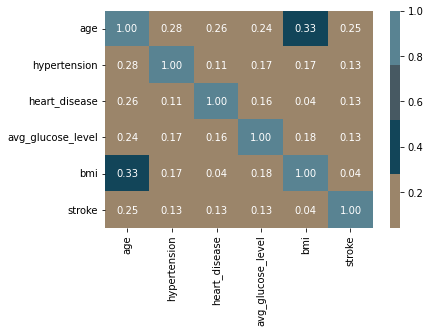

In [812]:
#from IPython.core.pylabtools import figsize
#f,ax=plt.subplots(figsize=(6,6))
#sns.heatmap(df_pd_org.corr(),center=0, linewidths=0.8,cmap='Greens',annot=True)
from matplotlib import colors
cmap = colors.ListedColormap(['#9B856A', '#124559', '#475962', '#598392'])
sns.heatmap(df_pd_org.corr(), annot=True, fmt='.2f', cmap=cmap)


ID has no role to predict stroke. Furthermore, correlation between bmi and stroke is very low (under 0.05)

In [813]:
# Map stroke to Yes for 1 and No for 0 as stroke_category
df['stroke_category'] = df['stroke'].asfactor()
df["stroke_category"] = (df["stroke"] == 1).ifelse("Yes", "No")
df.head()

id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1,Yes
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Yes
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1,Yes
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1,Yes
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Yes
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Yes
27419,Female,59,0,0,Yes,Private,Rural,76.15,nan,Unknown,1,Yes
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Yes


Mapped stroke to category of Yes and No for H2O AutoML Learning

In [814]:
#Get the type of data
df.types

{'Residence_type': 'enum',
 'age': 'real',
 'avg_glucose_level': 'real',
 'bmi': 'real',
 'ever_married': 'enum',
 'gender': 'enum',
 'heart_disease': 'int',
 'hypertension': 'int',
 'id': 'int',
 'smoking_status': 'enum',
 'stroke': 'int',
 'stroke_category': 'enum',
 'work_type': 'enum'}

In [815]:
# Get Idea of Categorical Variable
for feature in df.columns:
  if df[feature].types[feature] not in ['real','int']:


    print(f'{feature}: {df[feature].unique()}')

C1
Female
Male
Other


gender: 


C1
No
Yes


ever_married: 


C1
Govt_job
Never_worked
Private
Self-employed
children


work_type: 


C1
Rural
Urban


Residence_type: 


C1
Unknown
formerly smoked
never smoked
smokes


smoking_status: 


C1
No
Yes


stroke_category: 


In [816]:
#Get data shape
df.shape

(5110, 13)

In [817]:
#Get stats of air data

df.describe()

Rows:5110
Cols:13




,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
type,int,enum,real,int,int,enum,enum,enum,real,real,enum,int,enum
mins,67.0,,0.08,0.0,0.0,,,,55.12,10.3,,0.0,
mean,36517.829354207424,,43.22661448140898,0.0974559686888454,0.05401174168297456,,,,106.1476771037182,28.893236911794656,,0.04872798434442271,
maxs,72940.0,,82.0,1.0,1.0,,,,271.74,97.6,,1.0,
sigma,21161.72162482717,,22.612646723113485,0.2966066742337912,0.22606298750336545,,,,45.28356015058197,7.854066729680164,,0.2153198569802376,
zeros,0,,0,4612,4834,,,,0,0,,4861,
missing,0,0,0,0,0,0,0,0,0,201,0,0,0
0,9046.0,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1.0,Yes
1,51676.0,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,nan,never smoked,1.0,Yes
2,31112.0,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0,Yes


In [818]:
#Check if there are any null values
df.isna().sum()

201.0

This is related to the null bmi values but it is not a great deal

In [819]:
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [820]:
# Get the shape of the train and test
print(df_train.shape)
print(df_test.shape)

(4068, 13)
(1042, 13)


In [821]:
#Get Sample top 10 of train
df_train.head()


id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke_category
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Yes
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,nan,never smoked,1,Yes
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Yes
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1,Yes
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1,Yes
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Yes
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Yes
27419,Female,59,0,0,Yes,Private,Rural,76.15,nan,Unknown,1,Yes
60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Yes
12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,Yes


In [822]:
# Features and Target
X=df.columns
print(X)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'stroke_category']


In [823]:
#Separate features and target
y ='stroke'
y_category='stroke_category'
X.remove(y)
X.remove('id') # Remove id as it is useless
X.remove(y_category) 
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [824]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=123)

In [825]:
aml.train(x=X,y=y_category,training_frame=df_train)  

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20220214_35404_model_2


Model Summary: 


,,number_of_trees
0,,53.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.037470761282323704
RMSE: 0.1935736585445543
LogLoss: 0.13831726502223804
Mean Per-Class Error: 0.2520129496117103
AUC: 0.8890087191404
AUCPR: 0.3592484158865912
Gini: 0.7780174382808

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15443501621484756: 


,,No,Yes,Error,Rate
0,No,3629.0,244.0,0.063,(244.0/3873.0)
1,Yes,86.0,109.0,0.441,(86.0/195.0)
2,Total,3715.0,353.0,0.0811,(330.0/4068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.154435,0.397810,158.0
1,max f2,0.113249,0.511450,201.0
2,max f0point5,0.282246,0.426497,63.0
3,max accuracy,0.393947,0.955015,23.0
4,max precision,0.549160,1.000000,0.0
5,max recall,0.008546,1.000000,391.0
6,max specificity,0.549160,1.000000,0.0
7,max absolute_mcc,0.154435,0.376386,158.0
8,max min_per_class_accuracy,0.065332,0.810256,265.0
9,max mean_per_class_accuracy,0.064300,0.811772,267.0



Gains/Lift Table: Avg response rate:  4.79 %, avg score:  4.90 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010079,0.346095,11.702814,11.702814,0.560976,0.424500,0.560976,0.424500,0.117949,0.117949,1070.281426,1070.281426,0.113301
1,2,0.020157,0.289629,9.158724,10.430769,0.439024,0.315617,0.500000,0.370059,0.092308,0.210256,815.872420,943.076923,0.199670
2,3,0.030236,0.255498,7.632270,9.497936,0.365854,0.269136,0.455285,0.336418,0.076923,0.287179,663.227017,849.793621,0.269880
3,4,0.040069,0.228584,4.172308,8.191034,0.200000,0.241135,0.392638,0.313036,0.041026,0.328205,317.230769,719.103351,0.302644
4,5,0.050147,0.209635,4.070544,7.362896,0.195122,0.218323,0.352941,0.294000,0.041026,0.369231,307.054409,636.289593,0.335149
5,6,0.100049,0.136910,4.624479,5.997052,0.221675,0.171047,0.287469,0.232675,0.230769,0.600000,362.447897,499.705160,0.525123
6,7,0.150197,0.096948,2.147511,4.711771,0.102941,0.116487,0.225859,0.193882,0.107692,0.707692,114.751131,371.177137,0.585565
7,8,0.200098,0.071038,1.438727,3.895521,0.068966,0.082314,0.186732,0.166059,0.071795,0.779487,43.872679,289.552070,0.608560
8,9,0.300147,0.043665,0.871366,2.887469,0.041769,0.055862,0.138411,0.129326,0.087179,0.866667,-12.863353,188.746929,0.595043
9,10,0.399951,0.027742,0.616597,2.320798,0.029557,0.035333,0.111248,0.105871,0.061538,0.928205,-38.340280,132.079807,0.554851




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.040890292225035894
RMSE: 0.20221348180830054
LogLoss: 0.15254146661262052
Mean Per-Class Error: 0.26023555582037383
AUC: 0.8516547829483538
AUCPR: 0.21234742058220765
Gini: 0.7033095658967077

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11495661735534668: 


,,No,Yes,Error,Rate
0,No,3466.0,407.0,0.1051,(407.0/3873.0)
1,Yes,81.0,114.0,0.4154,(81.0/195.0)
2,Total,3547.0,521.0,0.12,(488.0/4068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.114957,0.318436,189.0
1,max f2,0.104811,0.448148,201.0
2,max f0point5,0.196354,0.277008,107.0
3,max accuracy,0.588239,0.951819,0.0
4,max precision,0.398700,0.375000,13.0
5,max recall,0.009266,1.000000,393.0
6,max specificity,0.588239,0.999742,0.0
7,max absolute_mcc,0.104811,0.310546,201.0
8,max min_per_class_accuracy,0.057952,0.779487,271.0
9,max mean_per_class_accuracy,0.057952,0.780784,271.0



Gains/Lift Table: Avg response rate:  4.79 %, avg score:  4.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010079,0.339976,6.105816,6.105816,0.292683,0.408789,0.292683,0.408789,0.061538,0.061538,510.581614,510.581614,0.054051
1,2,0.020157,0.272791,7.123452,6.614634,0.341463,0.299515,0.317073,0.354152,0.071795,0.133333,612.345216,561.463415,0.118874
2,3,0.030236,0.239772,5.596998,6.275422,0.268293,0.252848,0.300813,0.320384,0.056410,0.189744,459.699812,527.542214,0.167539
3,4,0.040069,0.218876,4.172308,5.759320,0.200000,0.228276,0.276074,0.297781,0.041026,0.230769,317.230769,475.932043,0.200302
4,5,0.050147,0.201910,3.561726,5.317647,0.170732,0.210702,0.254902,0.280280,0.035897,0.266667,256.172608,431.764706,0.227421
5,6,0.100049,0.142193,4.007882,4.664373,0.192118,0.171364,0.223587,0.225956,0.200000,0.466667,300.788177,366.437346,0.385076
6,7,0.150197,0.097388,3.170136,4.165479,0.151961,0.117995,0.199673,0.189910,0.158974,0.625641,217.013575,316.547904,0.499382
7,8,0.200098,0.071829,1.849792,3.587980,0.088670,0.083482,0.171990,0.163368,0.092308,0.717949,84.979159,258.797959,0.543923
8,9,0.300147,0.043798,1.127651,2.767870,0.054054,0.056678,0.132678,0.127805,0.112821,0.830769,12.765073,176.786997,0.557338
9,10,0.399951,0.028138,0.616597,2.231043,0.029557,0.035696,0.106945,0.104820,0.061538,0.892308,-38.340280,123.104345,0.517146




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.889871,0.029034,0.934889,0.855037,0.884521,0.894219,0.880689
1,auc,0.853400,0.027369,0.888222,0.833383,0.825922,0.876284,0.843189
2,err,0.110129,0.029034,0.065111,0.144963,0.115479,0.105781,0.119311
3,err_count,89.600000,23.628372,53.000000,118.000000,94.000000,86.000000,97.000000
4,f0point5,0.279287,0.059966,0.367965,0.219378,0.272331,0.304740,0.232019
5,f1,0.340974,0.049016,0.390805,0.289157,0.347222,0.385714,0.291971
6,f2,0.447723,0.053467,0.416667,0.424028,0.478927,0.525292,0.393701
7,lift_top_group,6.954986,4.337097,11.595442,6.957265,6.957265,9.264957,0.000000
8,logloss,0.152541,0.008527,0.142731,0.160873,0.153857,0.144766,0.160480
9,max_per_class_error,0.420513,0.103521,0.564103,0.384615,0.358974,0.307692,0.487179



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 03:55:42,7.227 sec,0.0,0.500000,0.693147,0.500000,0.047935,1.000000,0.952065
1,,2022-02-14 03:55:43,7.261 sec,5.0,0.239490,0.250635,0.781559,0.224551,9.321113,0.103736
2,,2022-02-14 03:55:43,7.295 sec,10.0,0.206523,0.180495,0.814636,0.256511,8.940659,0.112832
3,,2022-02-14 03:55:43,7.326 sec,15.0,0.200783,0.161165,0.852239,0.278142,9.667542,0.070551
4,,2022-02-14 03:55:43,7.367 sec,20.0,0.198456,0.152590,0.867776,0.303930,10.685178,0.096608
5,,2022-02-14 03:55:43,7.409 sec,25.0,0.197361,0.148101,0.873997,0.315815,11.193996,0.085054
6,,2022-02-14 03:55:43,7.458 sec,30.0,0.196454,0.145172,0.875536,0.322772,11.702814,0.080875
7,,2022-02-14 03:55:43,7.505 sec,35.0,0.195711,0.143136,0.878794,0.331898,11.702814,0.094641
8,,2022-02-14 03:55:43,7.550 sec,40.0,0.195227,0.141782,0.880766,0.338763,12.211632,0.090462
9,,2022-02-14 03:55:43,7.602 sec,45.0,0.194678,0.140338,0.882812,0.344965,12.211632,0.083825



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,168.373428,1.000000,0.456330
1,bmi,90.227295,0.535876,0.244536
2,avg_glucose_level,47.993397,0.285041,0.130073
3,work_type.Self-employed,15.945599,0.094704,0.043216
4,heart_disease,10.820699,0.064266,0.029327
5,hypertension,9.839506,0.058439,0.026667
6,smoking_status.smokes,9.014732,0.053540,0.024432
7,smoking_status.never smoked,7.423358,0.044089,0.020119
8,work_type.Private,3.774902,0.022420,0.010231
9,smoking_status.formerly smoked,1.996025,0.011855,0.005410


Cross validation data auc is 0.83 and max accuracy of 0.95

In [826]:
aml.leaderboard.as_data_frame()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,XGBoost_grid_1_AutoML_1_20220214_35404_model_2,0.851655,0.152541,0.212347,0.260236,0.202213,0.040890
1,XGBoost_grid_1_AutoML_1_20220214_35404_model_9,0.850819,0.152511,0.210785,0.318292,0.202635,0.041061
2,StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_35404,0.848635,0.152455,0.208955,0.260383,0.202467,0.040993
3,StackedEnsemble_BestOfFamily_1_AutoML_1_20220214_35404,0.846325,0.153038,0.209144,0.313587,0.202755,0.041110
4,StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_35404,0.844568,0.153487,0.205425,0.316409,0.202890,0.041164
5,StackedEnsemble_AllModels_1_AutoML_1_20220214_35404,0.844554,0.153682,0.214937,0.305045,0.202998,0.041208
6,XGBoost_grid_1_AutoML_1_20220214_35404_model_16,0.844519,0.154286,0.203034,0.288369,0.202721,0.041096
7,XGBoost_grid_1_AutoML_1_20220214_35404_model_18,0.844341,0.155416,0.193564,0.296191,0.204372,0.041768
8,XGBoost_grid_1_AutoML_1_20220214_35404_model_6,0.844248,0.156011,0.203861,0.294067,0.205325,0.042158
9,XGBoost_grid_1_AutoML_1_20220214_35404_model_11,0.844139,0.154942,0.210992,0.271173,0.204198,0.041697


In [827]:
print(aml.leaderboard)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_1_20220214_35404_model_2,0.851655,0.152541,0.212347,0.260236,0.202213,0.0408903
XGBoost_grid_1_AutoML_1_20220214_35404_model_9,0.850819,0.152511,0.210785,0.318292,0.202635,0.0410611
StackedEnsemble_BestOfFamily_4_AutoML_1_20220214_35404,0.848635,0.152455,0.208955,0.260383,0.202467,0.040993
StackedEnsemble_BestOfFamily_1_AutoML_1_20220214_35404,0.846325,0.153038,0.209144,0.313587,0.202755,0.0411098
StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_35404,0.844568,0.153487,0.205425,0.316409,0.20289,0.0411643
StackedEnsemble_AllModels_1_AutoML_1_20220214_35404,0.844554,0.153682,0.214937,0.305045,0.202998,0.041208
XGBoost_grid_1_AutoML_1_20220214_35404_model_16,0.844519,0.154286,0.203034,0.288369,0.202721,0.0410958
XGBoost_grid_1_AutoML_1_20220214_35404_model_18,0.844341,0.155416,0.193564,0.296191,0.204372,0.0417679
XGBoost_grid_1_AutoML_1_20220214_35404_model_6,0.844248,0.156011,0.203861,0.294067,0.205325,0.0421585
XGBoost_grid_1_AutoML_1_20220214_35404_model_11,0.844139,0.154942,0.210992,0.271173,0.204198,0.0416969


XG Boost is the best performing model here

In [828]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GLM_1_AutoML_1_20220214_35404': 16,
 'XGBoost_grid_1_AutoML_1_20220214_35404_model_2': 0}

In [829]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

0


In [830]:
best_model.algo

'xgboost'

In [831]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

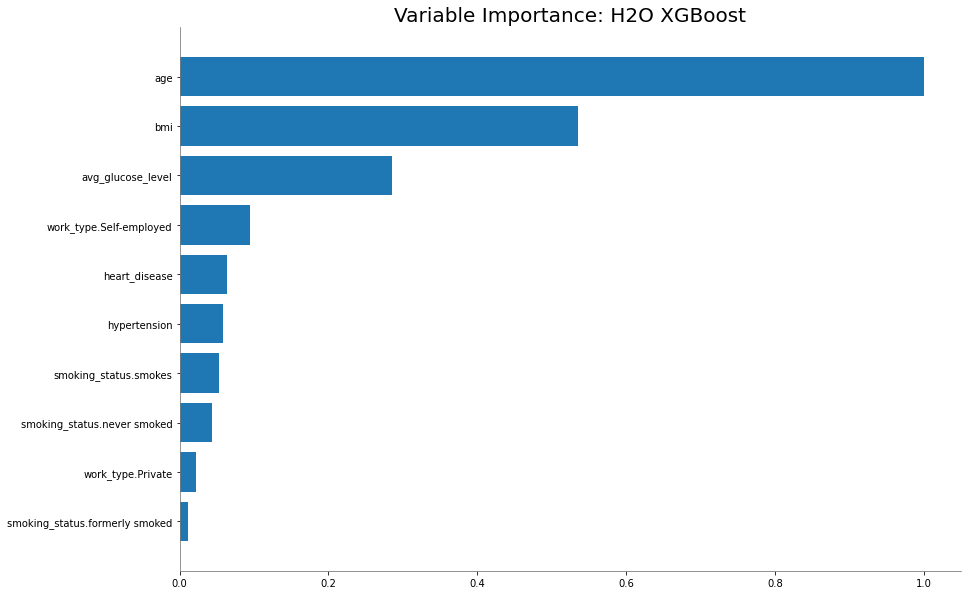

<Figure size 432x288 with 0 Axes>

In [832]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

Age, BMI and glucose level are the most important variables according to XGBoost

16
glm


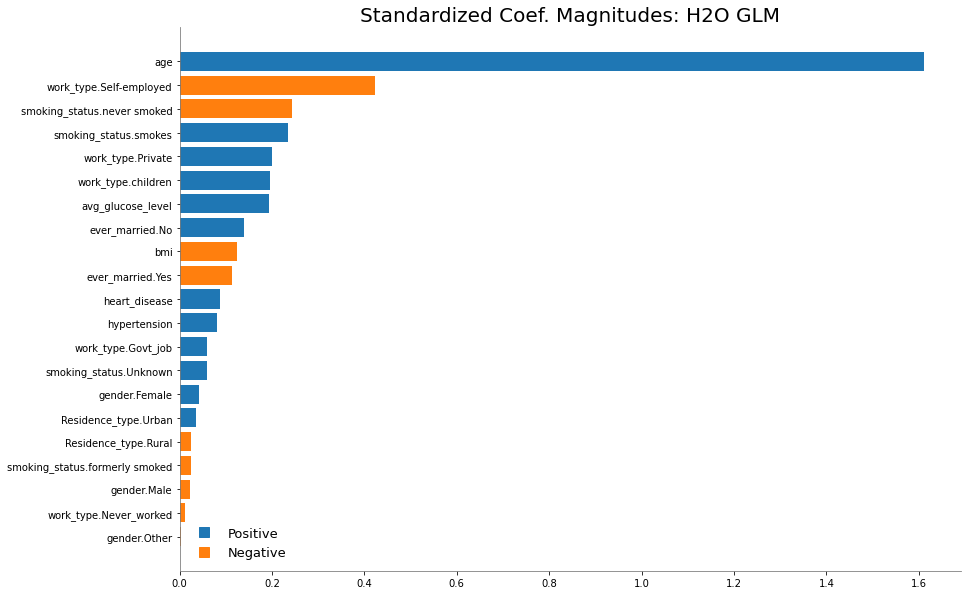

In [833]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

H20 GLM also predicts age as the most important variable followed by smoking status and glucose level

In [834]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [835]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'auc': 0.832977207977208,
 'gini': 0.665954415954416,
 'logloss': 0.1696116614126276,
 'mse': 0.04629387833013691,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.21516012253700012}

Test data auc is 0.86

In [836]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [837]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict,No,Yes
0,No,0.858064,0.141936
1,Yes,0.777977,0.222023
2,No,0.953155,0.046845
3,No,0.874705,0.125295
4,Yes,0.751649,0.248351


In [838]:
y_test=h2o.as_list(df_test[y_category])
y_test[0:5]

,stroke_category
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes


In [839]:
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'gender'.


/usr/local/lib/python3.7/dist-packages/h2o/model/model_base.py:1321: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


,gender,mean_response,stddev_response,std_error_mean_response
0,Female,0.049384,0.072256,0.001011
1,Male,0.049082,0.071689,0.001003
2,Other,0.049078,0.071566,0.001001



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'age'.


,age,mean_response,stddev_response,std_error_mean_response
0,0.080000,0.012180,0.007530,0.000105
1,4.391579,0.012180,0.007530,0.000105
2,8.703158,0.012180,0.007530,0.000105
3,13.014737,0.012180,0.007530,0.000105
4,17.326316,0.012180,0.007530,0.000105
5,21.637895,0.012180,0.007530,0.000105
6,25.949474,0.012180,0.007530,0.000105
7,30.261053,0.012180,0.007530,0.000105
8,34.572632,0.012180,0.007530,0.000105
9,38.884211,0.012561,0.007660,0.000107



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'hypertension'.


,hypertension,mean_response,stddev_response,std_error_mean_response
0,0.0,0.046586,0.068978,0.000965
1,1.0,0.063644,0.079927,0.001118



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'heart_disease'.


,heart_disease,mean_response,stddev_response,std_error_mean_response
0,0.0,0.047223,0.069037,0.000966
1,1.0,0.070188,0.077652,0.001086



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'ever_married'.


,ever_married,mean_response,stddev_response,std_error_mean_response
0,No,0.049275,0.072053,0.001008
1,Yes,0.049275,0.072053,0.001008



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'work_type'.


,work_type,mean_response,stddev_response,std_error_mean_response
0,Govt_job,0.052767,0.076906,0.001076
1,Never_worked,0.051829,0.075872,0.001061
2,Private,0.054912,0.082274,0.001151
3,Self-employed,0.039957,0.054021,0.000756
4,children,0.051829,0.075872,0.001061



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'Residence_type'.


,residence_type,mean_response,stddev_response,std_error_mean_response
0,Rural,0.049045,0.071338,0.000998
1,Urban,0.049447,0.072483,0.001014



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'avg_glucose_level'.


,avg_glucose_level,mean_response,stddev_response,std_error_mean_response
0,55.120000,0.039369,0.055381,0.000775
1,66.521053,0.039369,0.055381,0.000775
2,77.922105,0.042897,0.061927,0.000866
3,89.323158,0.043411,0.063216,0.000884
4,100.724211,0.047167,0.068636,0.000960
5,112.125263,0.047803,0.069973,0.000979
6,123.526316,0.048229,0.070259,0.000983
7,134.927368,0.049336,0.072147,0.001009
8,146.328421,0.048389,0.070509,0.000986
9,157.729474,0.048389,0.070509,0.000986



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'bmi'.


,bmi,mean_response,stddev_response,std_error_mean_response
0,10.300000,0.040008,0.059480,0.000832
1,14.894737,0.040008,0.059480,0.000832
2,19.489474,0.039485,0.058550,0.000819
3,24.084211,0.046683,0.068667,0.000961
4,28.678947,0.047360,0.062757,0.000878
5,33.273684,0.035761,0.047800,0.000669
6,37.868421,0.040311,0.053606,0.000750
7,42.463158,0.040500,0.052431,0.000733
8,47.057895,0.039128,0.050983,0.000713
9,51.652632,0.039128,0.050983,0.000713



PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20220214_35404_model_2 on column 'smoking_status'.


,smoking_status,mean_response,stddev_response,std_error_mean_response
0,Unknown,0.048743,0.072882,0.001020
1,formerly smoked,0.050043,0.074619,0.001044
2,never smoked,0.043817,0.063613,0.000890
3,smokes,0.063261,0.085080,0.001190


[, , , , , , , , , ]

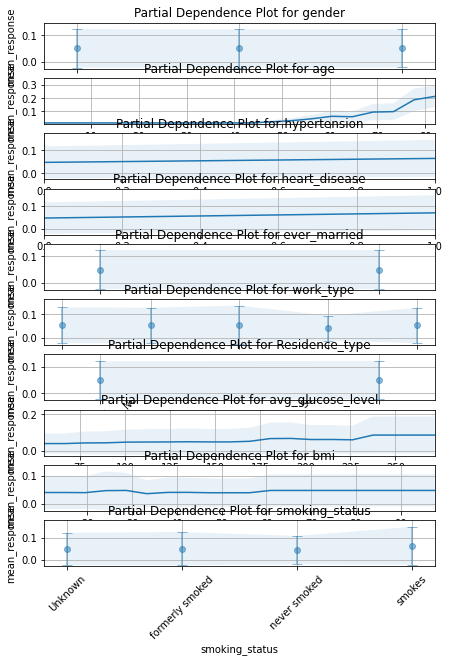

In [840]:
best_model.partial_plot(df, cols=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'])

Age has a big impact on stroke prediction according to partial plot

# Lets train our model again only on XGBoost

In [841]:
aml2 = H2OAutoML(max_runtime_secs=run_time, seed=123,include_algos = ["XGBoost"])

In [842]:
aml2.train(x=X,y=y_category,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_lr_search_selection_AutoML_2_20220214_35759_select_grid_model_3


Model Summary: 


,,number_of_trees
0,,165.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03740563711413062
RMSE: 0.1934053699206168
LogLoss: 0.13809352743243353
Mean Per-Class Error: 0.28949929492144827
AUC: 0.8900183386628003
AUCPR: 0.358182958153132
Gini: 0.7800366773256007

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20127491652965546: 


,,No,Yes,Error,Rate
0,No,3716.0,157.0,0.0405,(157.0/3873.0)
1,Yes,105.0,90.0,0.5385,(105.0/195.0)
2,Total,3821.0,247.0,0.0644,(262.0/4068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.201275,0.407240,124.0
1,max f2,0.112089,0.499238,202.0
2,max f0point5,0.282931,0.414414,64.0
3,max accuracy,0.323619,0.955015,47.0
4,max precision,0.578241,1.000000,0.0
5,max recall,0.008940,1.000000,387.0
6,max specificity,0.578241,1.000000,0.0
7,max absolute_mcc,0.201275,0.376606,124.0
8,max min_per_class_accuracy,0.065235,0.813065,261.0
9,max mean_per_class_accuracy,0.063929,0.818062,263.0



Gains/Lift Table: Avg response rate:  4.79 %, avg score:  4.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010079,0.354478,12.720450,12.720450,0.609756,0.434075,0.609756,0.434075,0.128205,0.128205,1172.045028,1172.045028,0.124074
1,2,0.020157,0.289831,9.158724,10.939587,0.439024,0.316218,0.524390,0.375146,0.092308,0.220513,815.872420,993.958724,0.210443
2,3,0.030236,0.259301,6.105816,9.328330,0.292683,0.274712,0.447154,0.341668,0.061538,0.282051,510.581614,832.833021,0.264494
3,4,0.040069,0.239159,6.780000,8.702973,0.325000,0.249862,0.417178,0.319139,0.066667,0.348718,578.000000,770.297310,0.324189
4,5,0.050147,0.218538,4.070544,7.771946,0.195122,0.228639,0.372549,0.300950,0.041026,0.389744,307.054409,677.194570,0.356694
5,6,0.100049,0.144154,3.802349,5.792024,0.182266,0.179646,0.277641,0.240447,0.189744,0.579487,280.234937,479.202419,0.503577
6,7,0.150197,0.095965,2.147511,4.575198,0.102941,0.119141,0.219313,0.199946,0.107692,0.687179,114.751131,357.519829,0.564019
7,8,0.200098,0.070705,2.055324,3.946778,0.098522,0.082793,0.189189,0.170729,0.102564,0.789744,105.532399,294.677755,0.619333
8,9,0.300147,0.042711,0.820110,2.904555,0.039312,0.055240,0.139230,0.132233,0.082051,0.871795,-17.989038,190.455490,0.600429
9,10,0.399951,0.027588,0.513831,2.307976,0.024631,0.034752,0.110633,0.107908,0.051282,0.923077,-48.616900,130.797598,0.549465




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.04085380406729125
RMSE: 0.20212323980010624
LogLoss: 0.15216178103966682
Mean Per-Class Error: 0.29143180599416074
AUC: 0.8517130429601383
AUCPR: 0.21381927003883608
Gini: 0.7034260859202766

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1437245100736618: 


,,No,Yes,Error,Rate
0,No,3562.0,311.0,0.0803,(311.0/3873.0)
1,Yes,98.0,97.0,0.5026,(98.0/195.0)
2,Total,3660.0,408.0,0.1005,(409.0/4068.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.143725,0.321725,164.0
1,max f2,0.093971,0.444840,214.0
2,max f0point5,0.176489,0.276400,134.0
3,max accuracy,0.570093,0.951819,0.0
4,max precision,0.411735,0.388889,14.0
5,max recall,0.008469,1.000000,396.0
6,max specificity,0.570093,0.999742,0.0
7,max absolute_mcc,0.093971,0.303278,214.0
8,max min_per_class_accuracy,0.056249,0.778466,273.0
9,max mean_per_class_accuracy,0.063830,0.783420,260.0



Gains/Lift Table: Avg response rate:  4.79 %, avg score:  4.97 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010079,0.345154,7.123452,7.123452,0.341463,0.419665,0.341463,0.419665,0.071795,0.071795,612.345216,612.345216,0.064824
1,2,0.020157,0.285930,6.614634,6.869043,0.317073,0.311038,0.329268,0.365351,0.066667,0.138462,561.463415,586.904315,0.124261
2,3,0.030236,0.253585,2.544090,5.427392,0.121951,0.268575,0.260163,0.333092,0.025641,0.164103,154.409006,442.739212,0.140607
3,4,0.040069,0.228983,5.215385,5.375366,0.250000,0.240687,0.257669,0.310416,0.051282,0.215385,421.538462,437.536574,0.184143
4,5,0.050147,0.211920,5.088180,5.317647,0.243902,0.220765,0.254902,0.292398,0.051282,0.266667,408.818011,431.764706,0.227421
5,6,0.100049,0.143534,4.521713,4.920658,0.216749,0.174704,0.235872,0.233696,0.225641,0.492308,352.171277,392.065772,0.412008
6,7,0.150197,0.095741,2.556561,4.131336,0.122549,0.118248,0.198036,0.195150,0.128205,0.620513,155.656109,313.133577,0.493996
7,8,0.200098,0.070592,1.644259,3.511094,0.078818,0.082413,0.168305,0.167035,0.082051,0.702564,64.425919,251.109431,0.527764
8,9,0.300147,0.043033,1.281421,2.767870,0.061425,0.055841,0.132678,0.129970,0.128205,0.830769,28.142128,176.786997,0.557338
9,10,0.399951,0.027509,0.513831,2.205399,0.024631,0.035119,0.105716,0.106301,0.051282,0.882051,-48.616900,120.539927,0.506374




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.883979,0.024246,0.888206,0.850123,0.886978,0.917589,0.876999
1,auc,0.854404,0.023839,0.886038,0.837221,0.835699,0.874114,0.838949
2,err,0.116021,0.024246,0.111794,0.149877,0.113022,0.082411,0.123001
3,err_count,94.400000,19.756012,91.000000,122.000000,92.000000,67.000000,100.000000
4,f0point5,0.266442,0.051345,0.285714,0.207207,0.277162,0.336391,0.225734
5,f1,0.334334,0.052568,0.363636,0.273810,0.352113,0.396396,0.285714
6,f2,0.451539,0.051175,0.500000,0.403509,0.482625,0.482456,0.389105
7,lift_top_group,6.954416,2.839132,6.957265,6.957265,9.276353,9.264957,2.316239
8,logloss,0.152162,0.008273,0.143469,0.159543,0.151645,0.144657,0.161497
9,max_per_class_error,0.405128,0.061217,0.333333,0.410256,0.358974,0.435897,0.487179



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 03:59:32,14.850 sec,0.0,0.500000,0.693147,0.500000,0.047935,1.000000,0.952065
1,,2022-02-14 03:59:32,14.915 sec,15.0,0.244237,0.259352,0.774803,0.219172,7.632270,0.070305
2,,2022-02-14 03:59:33,14.998 sec,30.0,0.207433,0.183282,0.835458,0.263434,9.158724,0.075959
3,,2022-02-14 03:59:33,15.080 sec,45.0,0.201155,0.162326,0.857680,0.280147,9.158724,0.084317
4,,2022-02-14 03:59:33,15.173 sec,60.0,0.198792,0.153463,0.864426,0.299888,10.685178,0.088250
5,,2022-02-14 03:59:33,15.270 sec,75.0,0.197476,0.148813,0.871502,0.310444,11.702814,0.076942
6,,2022-02-14 03:59:33,15.389 sec,90.0,0.196613,0.145793,0.874699,0.322144,11.702814,0.082350
7,,2022-02-14 03:59:33,15.488 sec,105.0,0.195740,0.143445,0.878405,0.327835,12.211632,0.075221
8,,2022-02-14 03:59:33,15.601 sec,120.0,0.195139,0.141862,0.882510,0.335718,12.211632,0.073255
9,,2022-02-14 03:59:33,15.724 sec,135.0,0.194572,0.140501,0.884728,0.340765,12.720450,0.075221



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,538.040405,1.000000,0.489792
1,bmi,218.473434,0.406054,0.198882
2,avg_glucose_level,141.039612,0.262136,0.128392
3,heart_disease,51.452728,0.095630,0.046839
4,work_type.Self-employed,42.957253,0.079840,0.039105
5,hypertension,28.878340,0.053673,0.026289
6,work_type.Private,24.556614,0.045641,0.022355
7,smoking_status.never smoked,17.886444,0.033244,0.016283
8,smoking_status.smokes,16.479372,0.030629,0.015002
9,smoking_status.formerly smoked,4.569619,0.008493,0.004160


Accuracy is high on cross validated data but the recall and F1 is less.Next is we can tune hyperparameters and include regularization and test

### HYPERPARAMETERS TUNING 

In [843]:
train_df, valid_df, test_df = df.split_frame(ratios=[0.6,0.2], seed=2018)

In [844]:
#target = "y_category"
target='y_category'
train_df[target] = train_df[y_category]
valid_df[target] = valid_df[y_category]
test_df[target] = test_df[y_category]
print("Number of rows in train, valid and test set : ", train_df.shape[0], valid_df.shape[0], test_df.shape[0])

Number of rows in train, valid and test set :  3074 1031 1005


In [845]:
from h2o.estimators import H2OGradientBoostingEstimator
predictors = [ 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
# initialize the H2O GBM 
gbm = H2OGradientBoostingEstimator()
# train with the initialized model
gbm.train(x=predictors, y=target, training_frame=train_df)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644810812616_9987


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,15827.0,5.0,5.0,5.0,9.0,30.0,20.58




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.025060366173781032
RMSE: 0.15830466251434616
LogLoss: 0.09272312194353753
Mean Per-Class Error: 0.18863903973568127
AUC: 0.9717920159575403
AUCPR: 0.7942198538019446
Gini: 0.9435840319150806

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3285504320109395: 


,,No,Yes,Error,Rate
0,No,2902.0,16.0,0.0055,(16.0/2918.0)
1,Yes,58.0,98.0,0.3718,(58.0/156.0)
2,Total,2960.0,114.0,0.0241,(74.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.328550,0.725926,88.0
1,max f2,0.162751,0.733104,163.0
2,max f0point5,0.396063,0.820312,70.0
3,max accuracy,0.328550,0.975927,88.0
4,max precision,0.902504,1.000000,0.0
5,max recall,0.020945,1.000000,343.0
6,max specificity,0.902504,1.000000,0.0
7,max absolute_mcc,0.328550,0.723271,88.0
8,max min_per_class_accuracy,0.105564,0.903846,215.0
9,max mean_per_class_accuracy,0.105564,0.909771,215.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.09 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.573833,19.705128,19.705128,1.000000,0.678570,1.000000,0.678570,0.198718,0.198718,1870.512821,1870.512821,0.198718
1,2,0.020169,0.478839,18.433830,19.069479,0.935484,0.520997,0.967742,0.599783,0.185897,0.384615,1743.382961,1806.947891,0.383930
2,3,0.030254,0.377193,16.526882,18.221947,0.838710,0.428001,0.924731,0.542522,0.166667,0.551282,1552.688172,1722.194651,0.548883
3,4,0.040013,0.310367,9.852564,16.180634,0.500000,0.342508,0.821138,0.493738,0.096154,0.647436,885.256410,1518.063373,0.639896
4,5,0.050098,0.236281,6.356493,14.203047,0.322581,0.264405,0.720779,0.447574,0.064103,0.711538,535.649297,1320.304695,0.696802
5,6,0.100195,0.129063,3.198884,8.700966,0.162338,0.174627,0.441558,0.311100,0.160256,0.871795,219.888445,770.096570,0.812850
6,7,0.149967,0.083445,0.901542,6.112437,0.045752,0.104539,0.310195,0.242545,0.044872,0.916667,-9.845819,511.243673,0.807688
7,8,0.200065,0.058323,0.639777,4.742047,0.032468,0.070345,0.240650,0.199425,0.032051,0.948718,-36.022311,374.204711,0.788677
8,9,0.300260,0.035566,0.255911,3.245048,0.012987,0.045575,0.164680,0.148086,0.025641,0.974359,-74.408924,224.504820,0.710137
9,10,0.400130,0.023307,0.192558,2.483167,0.009772,0.028948,0.126016,0.118350,0.019231,0.993590,-80.744174,148.316656,0.625187




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-02-14 04:00:58,0.005 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252
1,,2022-02-14 04:00:58,0.021 sec,1.0,0.214079,0.182795,0.895477,0.342003,11.183992,0.078725
2,,2022-02-14 04:00:58,0.040 sec,2.0,0.210511,0.173609,0.902657,0.353728,11.823077,0.071568
3,,2022-02-14 04:00:58,0.062 sec,3.0,0.207100,0.165813,0.907141,0.402426,11.716563,0.064411
4,,2022-02-14 04:00:58,0.080 sec,4.0,0.203766,0.158599,0.918447,0.433437,13.348635,0.055953
5,,2022-02-14 04:00:58,0.098 sec,5.0,0.201319,0.153628,0.921962,0.452180,13.984285,0.057580
6,,2022-02-14 04:00:58,0.120 sec,6.0,0.198973,0.149158,0.923516,0.462801,13.547276,0.049447
7,,2022-02-14 04:00:58,0.141 sec,7.0,0.197232,0.145685,0.926245,0.468489,13.984285,0.050748
8,,2022-02-14 04:00:58,0.162 sec,8.0,0.195745,0.142801,0.926671,0.473559,13.984285,0.050098
9,,2022-02-14 04:00:58,0.184 sec,9.0,0.194379,0.140147,0.929029,0.486903,13.984285,0.045543



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,103.068665,1.000000,0.391666
1,avg_glucose_level,57.656166,0.559396,0.219096
2,bmi,44.349041,0.430286,0.168528
3,smoking_status,20.528624,0.199174,0.078010
4,work_type,12.709065,0.123307,0.048295
5,hypertension,6.931976,0.067256,0.026342
6,ever_married,4.651108,0.045126,0.017674
7,heart_disease,4.641518,0.045033,0.017638
8,gender,4.531886,0.043970,0.017221
9,Residence_type,4.086537,0.039649,0.015529


In [846]:
gbm.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,15827.0,5.0,5.0,5.0,9.0,30.0,20.58


In [847]:
print(gbm.model_performance(test_df))


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.04229465189063547
RMSE: 0.2056566359022618
LogLoss: 0.16339245176917117
Mean Per-Class Error: 0.2964994775339603
AUC: 0.8170280390107977
AUCPR: 0.22217581388584498
Gini: 0.6340560780215954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11234785140533009: 


,,No,Yes,Error,Rate
0,No,868.0,89.0,0.093,(89.0/957.0)
1,Yes,24.0,24.0,0.5,(24.0/48.0)
2,Total,892.0,113.0,0.1124,(113.0/1005.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.112348,0.298137,108.0
1,max f2,0.085064,0.408163,139.0
2,max f0point5,0.449205,0.340909,9.0
3,max accuracy,0.449205,0.954229,9.0
4,max precision,0.795628,1.000000,0.0
5,max recall,0.003859,1.000000,380.0
6,max specificity,0.795628,1.000000,0.0
7,max absolute_mcc,0.112348,0.274758,108.0
8,max min_per_class_accuracy,0.038997,0.729167,228.0
9,max mean_per_class_accuracy,0.038997,0.736579,228.0



Gains/Lift Table: Avg response rate:  4.78 %, avg score:  4.70 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010945,0.448406,11.420455,11.420455,0.545455,0.591446,0.545455,0.591446,0.125000,0.125000,1042.045455,1042.045455,0.119775
1,2,0.020896,0.378286,2.093750,6.979167,0.100000,0.412421,0.333333,0.506196,0.020833,0.145833,109.375000,597.916667,0.131204
2,3,0.030846,0.317414,4.187500,6.078629,0.200000,0.346342,0.290323,0.454630,0.041667,0.187500,318.750000,507.862903,0.164511
3,4,0.040796,0.263349,0.000000,4.596037,0.000000,0.290436,0.219512,0.414583,0.000000,0.187500,-100.000000,359.603659,0.154062
4,5,0.050746,0.216189,8.375000,5.337010,0.400000,0.232585,0.254902,0.378897,0.083333,0.270833,737.500000,433.700980,0.231126
5,6,0.100498,0.126848,2.931250,4.146040,0.140000,0.163581,0.198020,0.272305,0.145833,0.416667,193.125000,314.603960,0.332027
6,7,0.150249,0.084506,3.350000,3.882450,0.160000,0.101235,0.185430,0.215659,0.166667,0.583333,235.000000,288.245033,0.454807
7,8,0.200000,0.060001,0.837500,3.125000,0.040000,0.071465,0.149254,0.179790,0.041667,0.625000,-16.250000,212.500000,0.446317
8,9,0.300498,0.036060,1.036510,2.426531,0.049505,0.045983,0.115894,0.135040,0.104167,0.729167,3.650990,142.653146,0.450170
9,10,0.400000,0.022962,0.628125,1.979167,0.030000,0.028807,0.094527,0.108614,0.062500,0.791667,-37.187500,97.916667,0.411311


AUC is high on train data , but is is low on test data. The model may be overfitting. Moreover, our model is struggling to predict the positive intance of stroke as recall is less

# Playing with more Hyperparameters

In [848]:
tuned_gbm  = H2OGradientBoostingEstimator(
    ntrees = 2000,
    learn_rate = 0.02,
    stopping_rounds = 25,
    stopping_metric = "AUC",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 1234
)      
tuned_gbm.train(x=predictors, y=target, training_frame=train_df, validation_frame=valid_df)

gbm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1644810812616_10040


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,62.0,62.0,21101.0,5.0,5.0,5.0,13.0,29.0,22.596775




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.03650972600054699
RMSE: 0.19107518415677896
LogLoss: 0.1332867528850113
Mean Per-Class Error: 0.24677510061334598
AUC: 0.9372945993919264
AUCPR: 0.5497601213445517
Gini: 0.8745891987838528

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19964624201098477: 


,,No,Yes,Error,Rate
0,No,2862.0,56.0,0.0192,(56.0/2918.0)
1,Yes,74.0,82.0,0.4744,(74.0/156.0)
2,Total,2936.0,138.0,0.0423,(130.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.199646,0.557823,92.0
1,max f2,0.114010,0.605901,172.0
2,max f0point5,0.206428,0.586890,86.0
3,max accuracy,0.252277,0.959336,54.0
4,max precision,0.491983,1.000000,0.0
5,max recall,0.023136,1.000000,363.0
6,max specificity,0.491983,1.000000,0.0
7,max absolute_mcc,0.199646,0.536814,92.0
8,max min_per_class_accuracy,0.075990,0.852564,229.0
9,max mean_per_class_accuracy,0.066388,0.866470,247.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.326321,16.526882,16.526882,0.838710,0.386618,0.838710,0.386618,0.166667,0.166667,1552.688172,1552.688172,0.164953
1,2,0.020169,0.258967,12.077337,14.302109,0.612903,0.290689,0.725806,0.338654,0.121795,0.288462,1107.733664,1330.210918,0.282636
2,3,0.030254,0.229379,9.534739,12.712986,0.483871,0.242574,0.645161,0.306627,0.096154,0.384615,853.473945,1171.298594,0.373306
3,4,0.040013,0.207331,10.509402,12.175526,0.533333,0.218425,0.617886,0.285114,0.102564,0.487179,950.940171,1117.552637,0.471073
4,5,0.050098,0.188809,5.085194,10.748252,0.258065,0.198145,0.545455,0.267608,0.051282,0.538462,408.519438,974.825175,0.514473
5,6,0.100195,0.120643,3.582751,7.165501,0.181818,0.151824,0.363636,0.209716,0.179487,0.717949,258.275058,616.550117,0.650779
6,7,0.149967,0.083539,1.674292,5.343039,0.084967,0.099949,0.271150,0.173286,0.083333,0.801282,67.429194,434.303910,0.686135
7,8,0.200065,0.066729,1.791375,4.453679,0.090909,0.074836,0.226016,0.148633,0.089744,0.891026,79.137529,345.367938,0.727900
8,9,0.299935,0.044307,0.577675,3.163079,0.029316,0.054233,0.160521,0.117201,0.057692,0.948718,-42.232523,216.307915,0.683468
9,10,0.400130,0.032332,0.319888,2.451126,0.016234,0.037374,0.124390,0.097211,0.032051,0.980769,-68.011156,145.112570,0.611681




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0381190482533507
RMSE: 0.19524100044137938
LogLoss: 0.14882797809348847
Mean Per-Class Error: 0.3379873788595898
AUC: 0.8391142663962137
AUCPR: 0.20584278710309598
Gini: 0.6782285327924273

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1562802074941645: 


,,No,Yes,Error,Rate
0,No,933.0,53.0,0.0538,(53.0/986.0)
1,Yes,28.0,17.0,0.6222,(28.0/45.0)
2,Total,961.0,70.0,0.0786,(81.0/1031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.156280,0.295652,67.0
1,max f2,0.066964,0.422886,181.0
2,max f0point5,0.156280,0.261538,67.0
3,max accuracy,0.388775,0.957323,0.0
4,max precision,0.388775,1.000000,0.0
5,max recall,0.017391,1.000000,386.0
6,max specificity,0.388775,1.000000,0.0
7,max absolute_mcc,0.066964,0.280773,181.0
8,max min_per_class_accuracy,0.062024,0.777778,196.0
9,max mean_per_class_accuracy,0.066964,0.782443,181.0



Gains/Lift Table: Avg response rate:  4.36 %, avg score:  5.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010669,0.288750,8.331313,8.331313,0.363636,0.333794,0.363636,0.333794,0.088889,0.088889,733.131313,733.131313,0.081789
1,2,0.020369,0.234352,2.291111,5.455026,0.100000,0.256540,0.238095,0.297006,0.022222,0.111111,129.111111,445.502646,0.094884
2,3,0.030068,0.202545,4.582222,5.173477,0.200000,0.215273,0.225806,0.270641,0.044444,0.155556,358.222222,417.347670,0.131215
3,4,0.040737,0.191942,6.248485,5.455026,0.272727,0.195769,0.238095,0.251032,0.066667,0.222222,524.848485,445.502646,0.189768
4,5,0.050436,0.181133,2.291111,4.846581,0.100000,0.185206,0.211538,0.238373,0.022222,0.244444,129.111111,384.658120,0.202862
5,6,0.100873,0.122815,3.965385,4.405983,0.173077,0.146262,0.192308,0.192317,0.200000,0.444444,296.538462,340.598291,0.359252
6,7,0.150339,0.088466,2.246187,3.695341,0.098039,0.102903,0.161290,0.162897,0.111111,0.555556,124.618736,269.534050,0.423710
7,8,0.200776,0.069383,2.643590,3.431133,0.115385,0.078672,0.149758,0.141739,0.133333,0.688889,164.358974,243.113258,0.510390
8,9,0.300679,0.048745,1.112190,2.660645,0.048544,0.058951,0.116129,0.114232,0.111111,0.800000,11.218986,166.064516,0.522110
9,10,0.400582,0.034815,0.889752,2.218994,0.038835,0.040813,0.096852,0.095922,0.088889,0.888889,-11.024811,121.899381,0.510593




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 04:01:01,0.005 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252,0.204432,0.179914,0.500000,0.043647,1.000000,0.956353
1,,2022-02-14 04:01:01,0.026 sec,1.0,0.218779,0.197648,0.875437,0.249113,6.390852,0.100520,0.204012,0.178184,0.797487,0.133439,4.295833,0.097963
2,,2022-02-14 04:01:01,0.048 sec,2.0,0.217968,0.194353,0.897692,0.292823,8.263441,0.108003,0.203479,0.176093,0.819146,0.149161,1.909259,0.101843
3,,2022-02-14 04:01:01,0.067 sec,3.0,0.217282,0.191778,0.901856,0.318154,8.867308,0.087833,0.203017,0.174423,0.829536,0.174719,4.165657,0.102813
4,,2022-02-14 04:01:01,0.096 sec,4.0,0.216569,0.189235,0.906658,0.349993,10.806038,0.087833,0.202716,0.173332,0.828499,0.167700,6.248485,0.094083
5,,2022-02-14 04:01:01,0.124 sec,5.0,0.215826,0.186631,0.913336,0.379999,12.077337,0.074496,0.202403,0.172172,0.833390,0.166751,2.082828,0.104753
6,,2022-02-14 04:01:01,0.152 sec,6.0,0.215016,0.184031,0.913753,0.402035,12.712986,0.076773,0.202059,0.170947,0.831744,0.159783,2.082828,0.096023
7,,2022-02-14 04:01:01,0.180 sec,7.0,0.214406,0.182104,0.913750,0.403845,14.619934,0.074170,0.201714,0.169794,0.830911,0.161265,0.000000,0.095053
8,,2022-02-14 04:01:01,0.209 sec,8.0,0.213730,0.180093,0.915652,0.415423,14.619934,0.072869,0.201408,0.168847,0.826820,0.162809,2.082828,0.082444
9,,2022-02-14 04:01:01,0.241 sec,9.0,0.213124,0.178322,0.917529,0.415653,13.348635,0.068640,0.201072,0.167833,0.825907,0.164233,2.082828,0.075655



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,315.759033,1.000000,0.446890
1,avg_glucose_level,143.798981,0.455407,0.203517
2,bmi,109.598557,0.347096,0.155113
3,smoking_status,48.870167,0.154770,0.069165
4,work_type,25.091757,0.079465,0.035512
5,heart_disease,21.789858,0.069008,0.030839
6,hypertension,18.292881,0.057933,0.025890
7,Residence_type,12.311567,0.038990,0.017424
8,gender,5.865347,0.018575,0.008301
9,ever_married,5.192275,0.016444,0.007349


Age and glucose level are most important parameters

In [849]:
tuned_gbm.model_performance(valid_df).auc()


0.8391142663962137

AUC score on validation data is 0.83 which is acceptable. Model is also showing slight overfitting. However the F1 and recall is not great

In [850]:
#Grid Search
from h2o.grid.grid_search import H2OGridSearch

grid_search_gbm = H2OGradientBoostingEstimator(
    nfolds=5,
    stopping_rounds = 25,
    stopping_metric = "AUC",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 1344,
    keep_cross_validation_predictions = True
) 

hyper_params = {
    'learn_rate':[0.01, 0.02, 0.03],
    'max_depth':[4,8,16,24],
    'ntrees':[50, 250, 1000]}

grid = H2OGridSearch(grid_search_gbm, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=target,
           training_frame=train_df,
           validation_frame=valid_df)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      learn_rate  max_depth  ntrees            model_ids   logloss
0           0.03        4.0    50.0   depth_grid_model_3  0.165510
1           0.03        4.0    40.0  depth_grid_model_15  0.167575
2           0.03        4.0    40.0  depth_grid_model_27  0.167575
3           0.02        4.0    50.0   depth_grid_model_2  0.168468
4           0.03        8.0    50.0   depth_grid_model_6  0.169350
5           0.02        4.0    46.0  depth_grid_model_14  0.169476
6           0.02        4.0    46.0  depth_grid_model_26  0.169476
7           0.03       24.0    50.0  depth_grid_model_12  0.171398
8           0.03       16.0    50.0   depth_grid_model_9  0.171666
9           0.02        8.0    50.0   depth_grid_model_5  0.171967
10          0.02       16.0    50.0   depth_grid_model_8  0.172017
11          0.02       24.0    50.0  depth_grid_model_11  0.172241
12          0.03        8.0    85.

In [851]:
grid_sorted = grid.get_grid(sort_by='auc',decreasing=True)

In [852]:
print(grid_sorted)

      learn_rate  max_depth  ntrees            model_ids       auc
0           0.03        4.0    50.0   depth_grid_model_3  0.846963
1           0.02        4.0    50.0   depth_grid_model_2  0.846800
2           0.01        4.0    50.0   depth_grid_model_1  0.845464
3           0.03        4.0    40.0  depth_grid_model_15  0.843903
4           0.03        4.0    40.0  depth_grid_model_27  0.843903
5           0.02        4.0    46.0  depth_grid_model_14  0.837590
6           0.02        4.0    46.0  depth_grid_model_26  0.837590
7           0.01        8.0    50.0   depth_grid_model_4  0.836173
8           0.03        8.0    50.0   depth_grid_model_6  0.835740
9           0.01        4.0    48.0  depth_grid_model_13  0.834148
10          0.01        4.0    48.0  depth_grid_model_25  0.834148
11          0.01       24.0    50.0  depth_grid_model_10  0.833188
12          0.01       16.0    50.0   depth_grid_model_7  0.832209
13          0.02        8.0    50.0   depth_grid_model_5  0.82

In [853]:
best_gbm = grid_sorted.models[0]

In [854]:
print(best_gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  depth_grid_model_3


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,11713.0,4.0,4.0,4.0,9.0,16.0,14.12




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.037989710212741605
RMSE: 0.19490949236181804
LogLoss: 0.13862497015523792
Mean Per-Class Error: 0.23232236691798036
AUC: 0.91914026115534
AUCPR: 0.45361678070763584
Gini: 0.83828052231068

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15926953513545264: 


,,No,Yes,Error,Rate
0,No,2778.0,140.0,0.048,(140.0/2918.0)
1,Yes,65.0,91.0,0.4167,(65.0/156.0)
2,Total,2843.0,231.0,0.0667,(205.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.159270,0.470284,129.0
1,max f2,0.119492,0.576520,169.0
2,max f0point5,0.265636,0.500000,52.0
3,max accuracy,0.316733,0.955433,33.0
4,max precision,0.496805,1.000000,0.0
5,max recall,0.020234,1.000000,362.0
6,max specificity,0.496805,1.000000,0.0
7,max absolute_mcc,0.123704,0.447451,164.0
8,max min_per_class_accuracy,0.067011,0.826923,247.0
9,max mean_per_class_accuracy,0.059195,0.842632,262.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.07 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.331326,13.348635,13.348635,0.677419,0.386103,0.677419,0.386103,0.134615,0.134615,1234.863524,1234.863524,0.131188
1,2,0.020169,0.269046,11.441687,12.395161,0.580645,0.301781,0.629032,0.343942,0.115385,0.250000,1044.168734,1139.516129,0.242118
2,3,0.030254,0.239998,8.899090,11.229804,0.451613,0.254410,0.569892,0.314098,0.089744,0.339744,789.909016,1022.980425,0.326036
3,4,0.040013,0.212937,6.568376,10.092871,0.333333,0.225018,0.512195,0.292371,0.064103,0.403846,556.837607,909.287054,0.383284
4,5,0.050098,0.191939,2.542597,8.573010,0.129032,0.202381,0.435065,0.274256,0.025641,0.429487,154.259719,757.301032,0.399672
5,6,0.100195,0.125266,4.862304,6.717657,0.246753,0.158818,0.340909,0.216537,0.243590,0.673077,386.230436,571.765734,0.603509
6,7,0.149967,0.088974,1.416709,4.958340,0.071895,0.104884,0.251627,0.179481,0.070513,0.743590,41.670856,395.834029,0.625358
7,8,0.200065,0.066693,1.663420,4.133271,0.084416,0.076763,0.209756,0.153760,0.083333,0.826923,66.341991,313.327079,0.660371
8,9,0.299935,0.044303,1.026977,3.098963,0.052117,0.054467,0.157267,0.120698,0.102564,0.929487,2.697737,209.896268,0.663209
9,10,0.400130,0.031922,0.383866,2.419085,0.019481,0.037500,0.122764,0.099865,0.038462,0.967949,-61.613387,141.908484,0.598175




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.03899700612300674
RMSE: 0.19747659639310866
LogLoss: 0.15103147085511526
Mean Per-Class Error: 0.301701600180302
AUC: 0.8319585305386522
AUCPR: 0.163793487917857
Gini: 0.6639170610773044

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11949006324391866: 


,,No,Yes,Error,Rate
0,No,895.0,91.0,0.0923,(91.0/986.0)
1,Yes,23.0,22.0,0.5111,(23.0/45.0)
2,Total,918.0,113.0,0.1106,(114.0/1031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.119490,0.278481,103.0
1,max f2,0.053647,0.403930,214.0
2,max f0point5,0.188323,0.241636,51.0
3,max accuracy,0.364025,0.956353,3.0
4,max precision,0.364025,0.500000,3.0
5,max recall,0.016101,1.000000,373.0
6,max specificity,0.465904,0.998986,0.0
7,max absolute_mcc,0.053647,0.266013,214.0
8,max min_per_class_accuracy,0.055125,0.758621,211.0
9,max mean_per_class_accuracy,0.053647,0.788900,214.0



Gains/Lift Table: Avg response rate:  4.36 %, avg score:  5.11 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010669,0.310610,4.165657,4.165657,0.181818,0.361642,0.181818,0.361642,0.044444,0.044444,316.565657,316.565657,0.035317
1,2,0.020369,0.253467,2.291111,3.273016,0.100000,0.284607,0.142857,0.324958,0.022222,0.066667,129.111111,227.301587,0.048411
2,3,0.030068,0.226229,4.582222,3.695341,0.200000,0.237329,0.161290,0.296691,0.044444,0.111111,358.222222,269.534050,0.084742
3,4,0.040737,0.208917,10.414141,5.455026,0.454545,0.217650,0.238095,0.275990,0.111111,0.222222,941.414141,445.502646,0.189768
4,5,0.050436,0.194953,4.582222,5.287179,0.200000,0.201237,0.230769,0.261614,0.044444,0.266667,358.222222,428.717949,0.226099
5,6,0.100873,0.125035,3.084188,4.185684,0.134615,0.154911,0.182692,0.208262,0.155556,0.422222,208.418803,318.568376,0.336015
6,7,0.150339,0.088018,2.695425,3.695341,0.117647,0.105506,0.161290,0.174452,0.133333,0.555556,169.542484,269.534050,0.423710
7,8,0.200776,0.068953,0.881197,2.988406,0.038462,0.076805,0.130435,0.149922,0.044444,0.600000,-11.880342,198.840580,0.417444
8,9,0.300679,0.046296,2.224380,2.734552,0.097087,0.058013,0.119355,0.119385,0.222222,0.822222,122.437972,173.455197,0.545346
9,10,0.400582,0.034945,0.667314,2.218994,0.029126,0.039929,0.096852,0.099569,0.066667,0.888889,-33.268608,121.899381,0.510593




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.044494861782774196
RMSE: 0.21093805200289065
LogLoss: 0.1655101251349979
Mean Per-Class Error: 0.25519323034744557
AUC: 0.8469633661974306
AUCPR: 0.18841060164267565
Gini: 0.6939267323948612

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.08921557651093798: 


,,No,Yes,Error,Rate
0,No,2551.0,367.0,0.1258,(367.0/2918.0)
1,Yes,60.0,96.0,0.3846,(60.0/156.0)
2,Total,2611.0,463.0,0.1389,(427.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.089216,0.310178,208.0
1,max f2,0.076817,0.448276,228.0
2,max f0point5,0.146912,0.248227,141.0
3,max accuracy,0.508281,0.949577,0.0
4,max precision,0.508281,1.000000,0.0
5,max recall,0.015993,1.000000,379.0
6,max specificity,0.508281,1.000000,0.0
7,max absolute_mcc,0.089216,0.300445,208.0
8,max min_per_class_accuracy,0.048931,0.756410,276.0
9,max mean_per_class_accuracy,0.040674,0.784868,295.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.337044,3.178246,3.178246,0.161290,0.393067,0.161290,0.393067,0.032051,0.032051,217.824648,217.824648,0.023141
1,2,0.020169,0.275705,3.178246,3.178246,0.161290,0.302396,0.161290,0.347732,0.032051,0.064103,217.824648,217.824648,0.046282
2,3,0.030254,0.239944,5.720844,4.025779,0.290323,0.255399,0.204301,0.316954,0.057692,0.121795,472.084367,302.577888,0.096435
3,4,0.040013,0.207661,5.254701,4.325516,0.266667,0.225130,0.219512,0.294558,0.051282,0.173077,425.470085,332.551595,0.140178
4,5,0.050098,0.180128,5.720844,4.606394,0.290323,0.194414,0.233766,0.274399,0.057692,0.230769,472.084367,360.639361,0.190331
5,6,0.100195,0.123432,3.582751,4.094572,0.181818,0.150356,0.207792,0.212377,0.179487,0.410256,258.275058,309.457209,0.326637
6,7,0.149967,0.089220,4.121334,4.103454,0.209150,0.103654,0.208243,0.176294,0.205128,0.615385,312.133400,310.345403,0.490299
7,8,0.200065,0.067389,1.023643,3.332249,0.051948,0.076738,0.169106,0.151364,0.051282,0.666667,2.364302,233.224932,0.491547
8,9,0.299935,0.043093,1.476280,2.714264,0.074919,0.053960,0.137744,0.118931,0.147436,0.814103,47.627996,171.426386,0.541656
9,10,0.400130,0.031581,0.703755,2.210819,0.035714,0.037062,0.112195,0.098431,0.070513,0.884615,-29.624542,121.081926,0.510386




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.878905,0.037692,0.933858,0.865741,0.872697,0.830964,0.891266
1,auc,0.849592,0.022084,0.854427,0.824724,0.868418,0.828356,0.872033
2,err,0.121095,0.037692,0.066142,0.134259,0.127303,0.169036,0.108734
3,err_count,74.600000,24.764894,42.000000,87.000000,76.000000,107.000000,61.000000
4,f0point5,0.270289,0.048570,0.308989,0.225564,0.281501,0.213849,0.321543
5,f1,0.334057,0.047034,0.343750,0.292683,0.355932,0.281879,0.396040
6,f2,0.443342,0.053831,0.387324,0.416667,0.483871,0.413386,0.515464
7,lift_top_group,3.118595,2.496405,6.978022,0.000000,3.015151,2.583674,3.016129
8,logloss,0.165679,0.015932,0.139638,0.165920,0.169494,0.183031,0.170311
9,max_per_class_error,0.422951,0.090006,0.576923,0.419355,0.363636,0.400000,0.354839



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 04:01:22,17.853 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252,0.204432,0.179914,0.500000,0.043647,1.000000,0.956353
1,,2022-02-14 04:01:22,17.866 sec,1.0,0.218641,0.197097,0.846776,0.209466,5.630037,0.107677,0.203885,0.177676,0.803944,0.119217,2.291111,0.151309
2,,2022-02-14 04:01:22,17.878 sec,2.0,0.217649,0.193208,0.867429,0.254377,7.389423,0.083279,0.203353,0.175635,0.809364,0.132009,2.749333,0.110572
3,,2022-02-14 04:01:22,17.891 sec,3.0,0.216754,0.189938,0.877586,0.286975,8.899090,0.079701,0.202848,0.173735,0.821580,0.139676,1.909259,0.137730
4,,2022-02-14 04:01:22,17.905 sec,4.0,0.215921,0.187101,0.884374,0.300085,8.359751,0.076448,0.202469,0.172328,0.820002,0.138953,2.082828,0.119302
5,,2022-02-14 04:01:22,17.920 sec,5.0,0.214893,0.183944,0.888414,0.320930,10.170389,0.071568,0.202146,0.171132,0.813331,0.134801,0.000000,0.111542
6,,2022-02-14 04:01:22,17.935 sec,6.0,0.214022,0.181291,0.891429,0.334379,11.084135,0.071568,0.201582,0.169282,0.826471,0.139217,2.082828,0.110572
7,,2022-02-14 04:01:22,17.950 sec,7.0,0.213291,0.179142,0.893642,0.337057,10.748252,0.069616,0.201208,0.167990,0.829547,0.141023,2.082828,0.110572
8,,2022-02-14 04:01:22,17.964 sec,8.0,0.212446,0.176841,0.894982,0.344399,10.806038,0.068640,0.200846,0.166812,0.828217,0.142371,2.082828,0.116392
9,,2022-02-14 04:01:22,17.977 sec,9.0,0.211801,0.175083,0.894991,0.337140,9.534739,0.069291,0.200544,0.165772,0.831722,0.143372,2.082828,0.123181



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,198.929138,1.000000,0.475878
1,avg_glucose_level,77.614861,0.390163,0.185670
2,bmi,62.866432,0.316024,0.150389
3,smoking_status,20.160482,0.101345,0.048228
4,work_type,16.090536,0.080886,0.038492
5,heart_disease,14.678956,0.073790,0.035115
6,hypertension,12.840269,0.064547,0.030716
7,gender,6.351700,0.031929,0.015195
8,ever_married,4.272201,0.021476,0.010220
9,Residence_type,4.220954,0.021218,0.010097


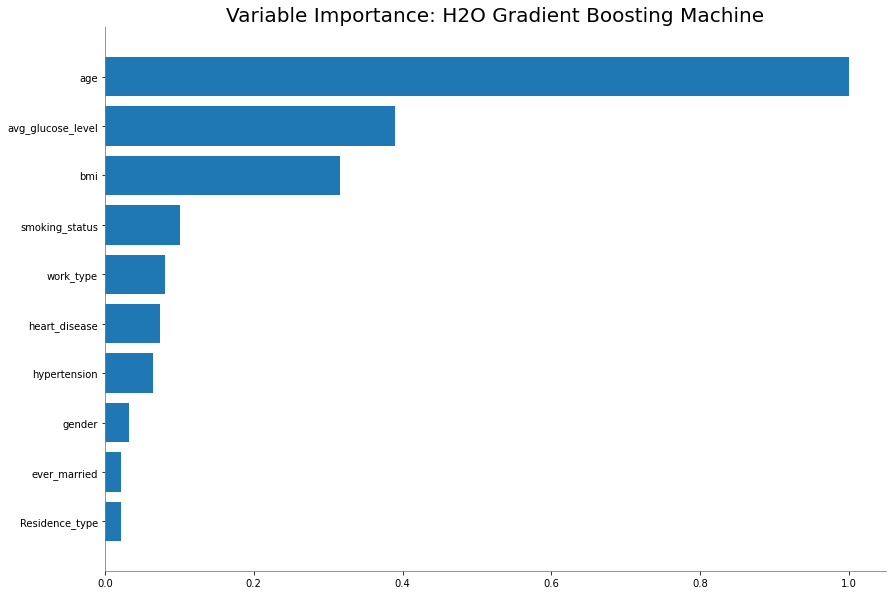

<Figure size 432x288 with 0 Axes>

In [855]:

best_gbm.varimp_plot()

In [856]:
from sklearn.metrics import roc_auc_score
pred_val = (best_gbm.predict(test_df[predictors])).as_data_frame()
true_val = (test_df[target]).as_data_frame()
print(pred_val)
print(true_val)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
     predict        No       Yes
0        Yes  0.816467  0.183533
1         No  0.909604  0.090396
2        Yes  0.799751  0.200249
3        Yes  0.764812  0.235188
4         No  0.902626  0.097374
...      ...       ...       ...
1000      No  0.952720  0.047280
1001      No  0.934592  0.065408
1002      No  0.957249  0.042751
1003      No  0.986207  0.013793
1004     Yes  0.612363  0.387637

[1005 rows x 3 columns]
     y_category
0           Yes
1           Yes
2           Yes
3           Yes
4           Yes
...         ...
1000         No
1001         No
1002         No
1003         No
1004         No

[1005 rows x 1 columns]


In [857]:
best_gbm.auc()


0.91914026115534

We can see the auc is high. Prediction with positive strokes still performs poor. Poor recall and F1

## Testing on more parameters

In [858]:
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': list(range(2, 11)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=predictors, y=target,
                training_frame=train_df,
                validation_frame=valid_df,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
#gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]
best_gbm2



gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid2_model_12


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,31142.0,5.0,5.0,5.0,11.0,28.0,20.23




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.031227127464562677
RMSE: 0.17671199015506187
LogLoss: 0.11049679094407233
Mean Per-Class Error: 0.21690084532785014
AUC: 0.9577423946855064
AUCPR: 0.6478145195396307
Gini: 0.9154847893710127

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2519241550491449: 


,,No,Yes,Error,Rate
0,No,2868.0,50.0,0.0171,(50.0/2918.0)
1,Yes,65.0,91.0,0.4167,(65.0/156.0)
2,Total,2933.0,141.0,0.0374,(115.0/3074.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.251924,0.612795,102.0
1,max f2,0.134179,0.657203,184.0
2,max f0point5,0.314939,0.678295,71.0
3,max accuracy,0.314939,0.965517,71.0
4,max precision,0.726326,1.000000,0.0
5,max recall,0.020836,1.000000,348.0
6,max specificity,0.726326,1.000000,0.0
7,max absolute_mcc,0.272173,0.597761,93.0
8,max min_per_class_accuracy,0.094265,0.891021,223.0
9,max mean_per_class_accuracy,0.091871,0.895206,227.0



Gains/Lift Table: Avg response rate:  5.07 %, avg score:  5.03 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010085,0.450057,18.433830,18.433830,0.935484,0.553585,0.935484,0.553585,0.185897,0.185897,1743.382961,1743.382961,0.185212
1,2,0.020169,0.372127,14.619934,16.526882,0.741935,0.410640,0.838710,0.482113,0.147436,0.333333,1361.993383,1552.688172,0.329906
2,3,0.030254,0.309097,11.441687,14.831817,0.580645,0.342161,0.752688,0.435462,0.115385,0.448718,1044.168734,1383.181693,0.440836
3,4,0.040013,0.272686,9.195726,13.457161,0.466667,0.291710,0.682927,0.400401,0.089744,0.538462,819.572650,1245.716073,0.525096
4,5,0.050098,0.240669,6.356493,12.027806,0.322581,0.254989,0.610390,0.371129,0.064103,0.602564,535.649297,1102.780553,0.582002
5,6,0.100195,0.139412,3.454795,7.741300,0.175325,0.183107,0.392857,0.277118,0.173077,0.775641,245.479520,674.130037,0.711556
6,7,0.149967,0.092757,2.447042,5.984204,0.124183,0.115154,0.303688,0.223365,0.121795,0.897436,144.704206,498.420379,0.787429
7,8,0.200065,0.066472,0.639777,4.645925,0.032468,0.079657,0.235772,0.187379,0.032051,0.929487,-36.022311,364.592454,0.768418
8,9,0.299935,0.037719,0.513489,3.269940,0.026059,0.049746,0.165944,0.141551,0.051282,0.980769,-48.651132,226.993993,0.717233
9,10,0.400130,0.025344,0.127955,2.483167,0.006494,0.030854,0.126016,0.113832,0.012821,0.993590,-87.204462,148.316656,0.625187




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.039543172879182
RMSE: 0.19885465264655489
LogLoss: 0.1486409745035424
Mean Per-Class Error: 0.30114942528735633
AUC: 0.8381226053639848
AUCPR: 0.1709226118279146
Gini: 0.6762452107279695

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1616992566764009: 


,,No,Yes,Error,Rate
0,No,918.0,68.0,0.069,(68.0/986.0)
1,Yes,24.0,21.0,0.5333,(24.0/45.0)
2,Total,942.0,89.0,0.0892,(92.0/1031.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.161699,0.313433,81.0
1,max f2,0.092036,0.416667,149.0
2,max f0point5,0.196728,0.276923,65.0
3,max accuracy,0.598294,0.955383,0.0
4,max precision,0.388442,0.333333,11.0
5,max recall,0.004372,1.000000,393.0
6,max specificity,0.598294,0.998986,0.0
7,max absolute_mcc,0.161699,0.289322,81.0
8,max min_per_class_accuracy,0.057217,0.768763,211.0
9,max mean_per_class_accuracy,0.042466,0.797938,242.0



Gains/Lift Table: Avg response rate:  4.36 %, avg score:  5.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010669,0.398260,6.248485,6.248485,0.272727,0.500706,0.272727,0.500706,0.066667,0.066667,524.848485,524.848485,0.058553
1,2,0.020369,0.335840,4.582222,5.455026,0.200000,0.364397,0.238095,0.435797,0.044444,0.111111,358.222222,445.502646,0.094884
2,3,0.030068,0.286851,2.291111,4.434409,0.100000,0.314282,0.193548,0.396598,0.022222,0.133333,129.111111,343.440860,0.107978
3,4,0.040737,0.265864,4.165657,4.364021,0.181818,0.274346,0.190476,0.364580,0.044444,0.177778,316.565657,336.402116,0.143295
4,5,0.050436,0.236519,4.582222,4.405983,0.200000,0.251615,0.192308,0.342856,0.044444,0.222222,358.222222,340.598291,0.179626
5,6,0.100873,0.141618,4.846581,4.626282,0.211538,0.183632,0.201923,0.263244,0.244444,0.466667,384.658120,362.628205,0.382488
6,7,0.150339,0.097396,1.796950,3.695341,0.078431,0.116012,0.161290,0.214800,0.088889,0.555556,79.694989,269.534050,0.423710
7,8,0.200776,0.071582,2.202991,3.320451,0.096154,0.084321,0.144928,0.182023,0.111111,0.666667,120.299145,232.045089,0.487153
8,9,0.300679,0.041364,2.001942,2.882366,0.087379,0.056608,0.125806,0.140353,0.200000,0.866667,100.194175,188.236559,0.591819
9,10,0.400582,0.027781,0.222438,2.218994,0.009709,0.033271,0.096852,0.113647,0.022222,0.888889,-77.756203,121.899381,0.510593




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-02-14 04:17:28,37.616 sec,0.0,0.219483,0.200712,0.500000,0.050748,1.000000,0.949252,0.204432,0.179914,0.500000,0.043647,1.000000,0.956353
1,,2022-02-14 04:17:28,37.632 sec,1.0,0.218112,0.195154,0.829169,0.247719,7.778340,0.071893,0.203685,0.177025,0.750248,0.130597,4.165657,0.125121
2,,2022-02-14 04:17:28,37.649 sec,2.0,0.216982,0.190903,0.887556,0.307867,9.852564,0.083930,0.203147,0.174957,0.792270,0.136761,3.524786,0.147430
3,,2022-02-14 04:17:28,37.671 sec,3.0,0.215872,0.187102,0.901659,0.337665,11.011689,0.082954,0.202634,0.173191,0.791864,0.140206,4.909524,0.078565
4,,2022-02-14 04:17:28,37.693 sec,4.0,0.215003,0.184283,0.907223,0.349116,9.534739,0.061158,0.202212,0.171626,0.817050,0.145210,2.082828,0.084384
5,,2022-02-14 04:17:28,37.717 sec,5.0,0.214105,0.181625,0.907276,0.358276,11.084135,0.058881,0.201873,0.170416,0.821648,0.145568,4.165657,0.121242
6,,2022-02-14 04:17:28,37.742 sec,6.0,0.213106,0.178788,0.908871,0.362028,10.170389,0.055953,0.201544,0.169168,0.827868,0.149110,4.165657,0.132881
7,,2022-02-14 04:17:28,37.769 sec,7.0,0.212186,0.176149,0.913971,0.369448,9.534739,0.069941,0.201048,0.167426,0.834900,0.154146,4.165657,0.113482
8,,2022-02-14 04:17:28,37.796 sec,8.0,0.211291,0.173771,0.915830,0.373813,9.534739,0.073195,0.200521,0.165805,0.835970,0.161690,4.165657,0.110572
9,,2022-02-14 04:17:28,37.829 sec,9.0,0.210280,0.171235,0.915858,0.378378,9.534739,0.052375,0.199958,0.164069,0.837255,0.164759,4.165657,0.101843



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,age,283.062439,1.000000,0.398798
1,avg_glucose_level,169.966583,0.600456,0.239460
2,bmi,111.492538,0.393880,0.157078
3,smoking_status,63.823544,0.225475,0.089919
4,work_type,23.845493,0.084241,0.033595
5,hypertension,16.721172,0.059072,0.023558
6,Residence_type,15.697096,0.055455,0.022115
7,heart_disease,12.366148,0.043687,0.017422
8,gender,9.029087,0.031898,0.012721
9,ever_married,3.785585,0.013374,0.005333


Changing the parameters is not improving much. Hyperparameters has improved accuracy but not recall and F1

In [859]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test_df)
best_gbm_perf2



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.041932903584130696
RMSE: 0.20477525139559882
LogLoss: 0.1601693723703132
Mean Per-Class Error: 0.2782458202716823
AUC: 0.8223615464994776
AUCPR: 0.22892953090852894
Gini: 0.6447230929989551

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14122989624050167: 


,,No,Yes,Error,Rate
0,No,883.0,74.0,0.0773,(74.0/957.0)
1,Yes,23.0,25.0,0.4792,(23.0/48.0)
2,Total,906.0,99.0,0.0965,(97.0/1005.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.141230,0.340136,95.0
1,max f2,0.141230,0.429553,95.0
2,max f0point5,0.141230,0.281532,95.0
3,max accuracy,0.581882,0.955224,2.0
4,max precision,0.719831,1.000000,0.0
5,max recall,0.004844,1.000000,380.0
6,max specificity,0.719831,1.000000,0.0
7,max absolute_mcc,0.141230,0.317393,95.0
8,max min_per_class_accuracy,0.041670,0.750000,220.0
9,max mean_per_class_accuracy,0.049905,0.761135,200.0



Gains/Lift Table: Avg response rate:  4.78 %, avg score:  4.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010945,0.421425,5.710227,5.710227,0.272727,0.534445,0.272727,0.534445,0.062500,0.062500,471.022727,471.022727,0.054141
1,2,0.020896,0.339739,6.281250,5.982143,0.300000,0.367381,0.285714,0.454891,0.062500,0.125000,528.125000,498.214286,0.109326
2,3,0.030846,0.296695,2.093750,4.727823,0.100000,0.312484,0.225806,0.408953,0.020833,0.145833,109.375000,372.782258,0.120755
3,4,0.040796,0.248598,4.187500,4.596037,0.200000,0.271319,0.219512,0.375384,0.041667,0.187500,318.750000,359.603659,0.154062
4,5,0.050746,0.208046,4.187500,4.515931,0.200000,0.226509,0.215686,0.346192,0.041667,0.229167,318.750000,351.593137,0.187369
5,6,0.100498,0.137489,5.862500,5.182550,0.280000,0.172768,0.247525,0.260339,0.291667,0.520833,486.250000,418.254950,0.441418
6,7,0.150249,0.090634,0.837500,3.743791,0.040000,0.110347,0.178808,0.210673,0.041667,0.562500,-16.250000,274.379139,0.432928
7,8,0.200000,0.063134,2.093750,3.333333,0.100000,0.077394,0.159204,0.177519,0.104167,0.666667,109.375000,233.333333,0.490073
8,9,0.300498,0.035271,0.829208,2.495861,0.039604,0.046069,0.119205,0.133557,0.083333,0.750000,-17.079208,149.586093,0.472048
9,10,0.400000,0.026025,0.418750,1.979167,0.020000,0.030514,0.094527,0.107924,0.041667,0.791667,-58.125000,97.916667,0.411311


## Recall is not that great. We are aimimg here at recall more as we cannot afford more false negatives. Shows evidence of overfitting as accuracy on train data is much more than test data. The error rate in predicting yes is still more

## More experimenting on different models using one hot encoding and playing with hyperparameters and regularization

In [860]:
data_onehot=pd.get_dummies(df_pd_org, prefix=None, dummy_na=False, columns=['gender','ever_married','work_type', 'Residence_type','smoking_status'], sparse=False, drop_first=True, dtype=None)
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [861]:
data_onehot['bmi'].fillna(data_onehot['bmi'].median(), inplace=True)

Filling BMI with its median value

In [862]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [863]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_stroke=data_onehot['stroke']
X_prep = data_onehot.drop(columns=['stroke'], inplace=False)
X_input = pd.DataFrame(data=scaler.fit_transform(X_prep), index=X_prep.index, columns=X_prep.columns)

## We have scaled the input data here

In [864]:
X_prep.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,0,0,1,0,0,1,0,0,0,1,0


# Applied l2 penalty to Logistic Regression

In [865]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
cv = KFold(n_splits=5, shuffle=True, random_state=427)
C_regul = [0.01, 0.1, 1,2,4,5]
for regul in C_regul:
    clf = LogisticRegression(penalty='l2', C=regul).fit(X_input, y_stroke)
    print('Cross-validation score: %f' % 
          cross_val_score(clf, X_input, y_stroke, cv=cv, scoring='roc_auc').mean())

Cross-validation score: 0.833622
Cross-validation score: 0.840212
Cross-validation score: 0.840169
Cross-validation score: 0.840101
Cross-validation score: 0.840184
Cross-validation score: 0.840199


We intoduced l2 regularization and tested data on it. Cross validation score revolves around 0.84 for different parameters

In [866]:
df_pd_org['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# We can see that the number of positive stroke prediction in the whole data is much less than the negative stroke prediction. We can assume our model shall be struggling with the training as it is not exposed to much equally sampled data i.e the data has much more 0's than 1's

In [867]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [868]:
x_infea=data_onehot.drop(columns='stroke')
y_outfea=data_onehot['stroke']

In [869]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
x_train_in,x_test_in,y_train_out,y_test_out=train_test_split(x_infea,y_outfea,test_size=0.2,random_state=421)


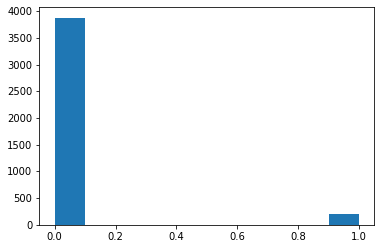

In [870]:
plt.hist(y_train_out);

## No of ones are very less and hence is the problem

## Using SMOTE to resample and balance data

            age  ...  smoking_status_smokes
0     63.000000  ...                      0
1     61.000000  ...                      0
2     50.000000  ...                      0
3     22.000000  ...                      0
4     71.000000  ...                      0
...         ...  ...                    ...
7751  79.294769  ...                      0
7752  73.981664  ...                      0
7753  59.441873  ...                      0
7754  78.000000  ...                      0
7755  60.095770  ...                      0

[7756 rows x 16 columns]


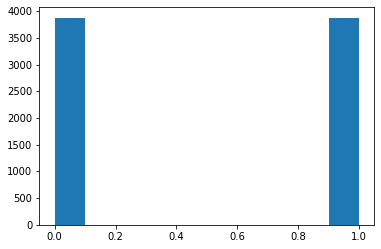

In [871]:
from imblearn.over_sampling import SMOTE
mod=SMOTE()
x_train1,y_train1=mod.fit_resample(x_train_in,y_train_out)
plt.hist(y_train1);
print(x_train1)

We have balanced the number of 0's and 1's

# Testing resampled on different regressions

In [872]:
#Applying Logistic Regression
#Apply l1 penalty
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lg=LogisticRegression(max_iter=500,penalty='l1',solver='liblinear',C=3.0)
#lg=LogisticRegression()
lg.fit(x_train1,y_train1)
print(confusion_matrix(y_test_out,lg.predict(x_test_in)))
print(classification_report(y_test_out,lg.predict(x_test_in)))
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, lg.predict(x_test_in), average='weighted'))
print("Recall")
(recall_score(y_test_out, lg.predict(x_test_in), average='macro'))

[[838 145]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       983
           1       0.10      0.41      0.16        39

    accuracy                           0.84      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.94      0.84      0.88      1022

F1 Score:
0.8803155736487088
Recall


0.6313743902757127

In [873]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out,lg.predict_proba(x_test_in)[:,1])

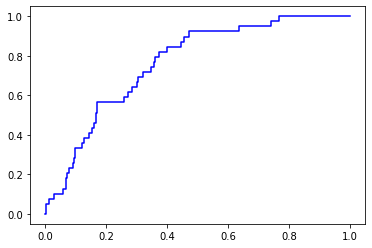

In [874]:
plt.plot(fpr,tpr,color='blue',label='logistic')

# The recall has improved with l1 penalty and the accuracy is good

In [875]:
df_pd_org.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [876]:
#Testing on XGB classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [ x for x in range(3,10,1)],
    'min_child_weight':[ x for x in range(1,6,1)],
    'n_estimators' : [ x for x in range(1, 150)],
    'gamma' : [0, 0.1, 0.001]
}
grid = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions= params, scoring='roc_auc',cv=5,verbose =3)

In [877]:
grid.fit(x_train1, y_train1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0.001, max_depth=3, min_child_weight=5, n_estimators=47;, score=0.926 total time=   0.6s
[CV 2/5] END gamma=0.001, max_depth=3, min_child_weight=5, n_estimators=47;, score=0.955 total time=   0.2s
[CV 3/5] END gamma=0.001, max_depth=3, min_child_weight=5, n_estimators=47;, score=0.957 total time=   0.2s
[CV 4/5] END gamma=0.001, max_depth=3, min_child_weight=5, n_estimators=47;, score=0.959 total time=   0.2s
[CV 5/5] END gamma=0.001, max_depth=3, min_child_weight=5, n_estimators=47;, score=0.959 total time=   0.2s
[CV 1/5] END gamma=0.001, max_depth=9, min_child_weight=3, n_estimators=128;, score=0.964 total time=   1.6s
[CV 2/5] END gamma=0.001, max_depth=9, min_child_weight=3, n_estimators=128;, score=0.992 total time=   1.6s
[CV 3/5] END gamma=0.001, max_depth=9, min_child_weight=3, n_estimators=128;, score=0.995 total time=   1.5s
[CV 4/5] END gamma=0.001, max_depth=9, min_child_weight=3, n_estimators=

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0, 0.1, 0.001],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='roc_auc', verbose=3)

In [878]:
grid.best_estimator_

XGBClassifier(gamma=0.001, max_depth=9, min_child_weight=3, n_estimators=128)

In [879]:
g=grid.best_estimator_.fit(x_train1,y_train1)

In [880]:
g.score(x_train1,y_train1)

0.9911036616812791

In [881]:
x_test_in= x_test_in[x_train1.columns]
x_test_in
g.score(x_test_in,y_test_out)

0.9178082191780822

In [882]:
y_prediction3=g.predict(x_test_in)
cm2 = confusion_matrix(y_test_out,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out,y_prediction3)
print(cr2)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, (y_prediction3), average='weighted'))
print("Recall")
print(recall_score(y_test_out, y_prediction3, average='weighted'))


[[934  49]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       983
           1       0.08      0.10      0.09        39

    accuracy                           0.92      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.93      0.92      0.92      1022

F1 Score:
0.9237671965162714
Recall
0.9178082191780822


The train and test accuracy is great. Recall and F1 is good

In [883]:
# logModel = LogisticRegression()
# param_grid = [    
#    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#    'C' : np.logspace(-4, 4, 20),
#    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#    'max_iter' : [100, 1000,2500, 5000]
#    }
# ]


In [884]:
#The model parameters are found by executing the above code and find the best parameters
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
    }
]

In [885]:
from sklearn.model_selection import GridSearchCV

In [886]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [887]:
best_clf = clf.fit(x_train1,y_train1)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


best_clf.best_estimator_ =LogisticRegression(C=1.623776739188721)
best_params={'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [888]:
best_clf.best_params_

{'C': 1.623776739188721, 'max_iter': 1500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [889]:
print (f'Accuracy - : {best_clf.score(x_train1,y_train1):.3f}')

Accuracy - : 0.851


In [890]:
best_clf.best_score_


0.8491529801644823

In [891]:
y_prediction=best_clf.predict(x_test_in)
cm = confusion_matrix(y_test_out,y_prediction)
print(cm)
cr=classification_report(y_test_out,y_prediction)
print(cr)

[[837 146]
 [ 23  16]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       983
           1       0.10      0.41      0.16        39

    accuracy                           0.83      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.94      0.83      0.88      1022



In [892]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out, y_prediction, average='weighted'))
print("Recall")
(recall_score(y_test_out, y_prediction, average='weighted'))

F1 Score:
0.8797157619073874
Recall


0.8346379647749511

Recall is 0.83 and F1 is 0.88

### Lets train and test the models by dropping the unimportant variables like gender, work type and residence

In [893]:
data_onehot.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [894]:
data_dropped=data_onehot.copy()

In [895]:
data_dropped=data_dropped.drop(['gender_Male','bmi', 'gender_Other', 'ever_married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed', 'work_type_children','Residence_type_Urban' ], axis=1)

In [896]:
data_dropped.head()

,age,hypertension,heart_disease,avg_glucose_level,stroke,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,1,1,0,0
1,61.0,0,0,202.21,1,0,1,0
2,80.0,0,1,105.92,1,0,1,0
3,49.0,0,0,171.23,1,0,0,1
4,79.0,1,0,174.12,1,0,1,0


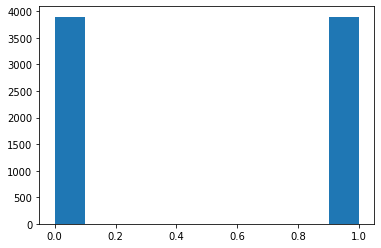

In [897]:
x_infea3=data_dropped.drop(columns='stroke')
y_outfea3=data_dropped['stroke']
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(x_infea3,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [898]:
y_train4.value_counts()

0    3899
1    3899
Name: stroke, dtype: int64

In [899]:
best_clf2= clf.fit(x_train4,y_train4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [900]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.835


In [901]:
best_clf2.best_score_

0.8305994909284636

In [902]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))

[[800 162]
 [ 32  28]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       962
           1       0.15      0.47      0.22        60

    accuracy                           0.81      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.91      0.81      0.85      1022

F1 Score:
0.8526526560594457
Recall


0.8101761252446184

Recall score is 0.80 and F1 Score is 0.84. Recall has improved for positive cases

## Now lets test on scaled data 

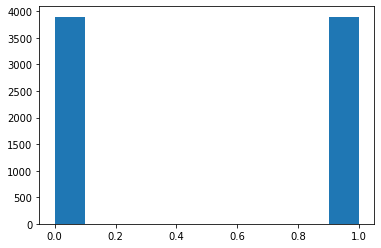

In [903]:
x_infea3=data_dropped.drop(columns='stroke')
y_outfea3=data_dropped['stroke']
scaler = StandardScaler()
scaler.fit(x_infea3)
X_scaled = scaler.transform(x_infea3)
X = pd.DataFrame(X_scaled, columns=x_infea3.columns)
x_train_in3,x_test_in3,y_train_out3,y_test_out3=train_test_split(X,y_outfea3,test_size=0.2,random_state=431)
mod=SMOTE()
x_train4,y_train4=mod.fit_resample(x_train_in3,y_train_out3)
plt.hist(y_train4);

In [904]:
best_clf2= clf.fit(x_train4,y_train4)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [905]:
print (f'Accuracy - : {best_clf2.score(x_train4,y_train4):.3f}')

Accuracy - : 0.773


In [906]:
y_prediction3=best_clf2.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
from sklearn.metrics import recall_score
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))


[[710 252]
 [ 10  50]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.84       962
           1       0.17      0.83      0.28        60

    accuracy                           0.74      1022
   macro avg       0.58      0.79      0.56      1022
weighted avg       0.94      0.74      0.81      1022

F1 Score:
0.8108872655553298
Recall


0.7436399217221135

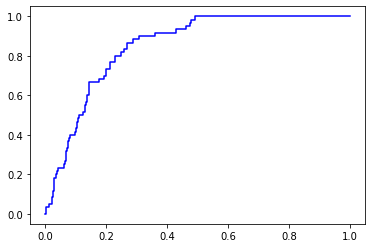

In [907]:
from sklearn.metrics import roc_curve
fpr,tpr,thresh=roc_curve(y_test_out3,best_clf2.predict_proba(x_test_in3)[:,1])
plt.plot(fpr,tpr,color='blue',label='logistic')

Recall on Stroke prediction is good. We have more number of predicting positive stroke and that is great here


### We can see though the accuracy and precision is not that great, the recall and F1 score is good. Seems to be the best model so far

In [908]:
#Testing on XGB classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': [ x for x in range(3,10,1)],
    'min_child_weight':[ x for x in range(1,6,1)],
    'n_estimators' : [ x for x in range(1, 150)],
    'gamma' : [0, 0.1, 0.001]
}
grid = RandomizedSearchCV(estimator = XGBClassifier(), param_distributions= params, scoring='roc_auc',cv=5,verbose =3)
grid.fit(x_train4, y_train4)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END gamma=0, max_depth=4, min_child_weight=2, n_estimators=58;, score=0.920 total time=   0.2s
[CV 2/5] END gamma=0, max_depth=4, min_child_weight=2, n_estimators=58;, score=0.937 total time=   0.2s
[CV 3/5] END gamma=0, max_depth=4, min_child_weight=2, n_estimators=58;, score=0.912 total time=   0.2s
[CV 4/5] END gamma=0, max_depth=4, min_child_weight=2, n_estimators=58;, score=0.938 total time=   0.2s
[CV 5/5] END gamma=0, max_depth=4, min_child_weight=2, n_estimators=58;, score=0.941 total time=   0.2s
[CV 1/5] END gamma=0.001, max_depth=6, min_child_weight=1, n_estimators=68;, score=0.950 total time=   0.4s
[CV 2/5] END gamma=0.001, max_depth=6, min_child_weight=1, n_estimators=68;, score=0.977 total time=   0.4s
[CV 3/5] END gamma=0.001, max_depth=6, min_child_weight=1, n_estimators=68;, score=0.966 total time=   0.4s
[CV 4/5] END gamma=0.001, max_depth=6, min_child_weight=1, n_estimators=68;, score=0.976 total 

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'gamma': [0, 0.1, 0.001],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='roc_auc', verbose=3)

In [909]:
grid.best_estimator_

XGBClassifier(gamma=0.001, max_depth=7, min_child_weight=3, n_estimators=72)

In [910]:
g=grid.best_estimator_.fit(x_train4,y_train4)

In [911]:
g.score(x_train4,y_train4)

0.9492177481405488

In [912]:
x_test_in3= x_test_in3[x_train4.columns]
x_test_in3
g.score(x_test_in3,y_test_out3)

0.8972602739726028

In [913]:
y_prediction3=g.predict(x_test_in3)
cm2 = confusion_matrix(y_test_out3,y_prediction3)
print(cm2)
cr2=classification_report(y_test_out3,y_prediction3)
print(cr2)

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("F1 Score:")
print(f1_score(y_test_out3, y_prediction3, average='weighted'))
print("Recall")
(recall_score(y_test_out3, y_prediction3, average='weighted'))





[[899  63]
 [ 42  18]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       962
           1       0.22      0.30      0.26        60

    accuracy                           0.90      1022
   macro avg       0.59      0.62      0.60      1022
weighted avg       0.91      0.90      0.90      1022

F1 Score:
0.9043442275331728
Recall


0.8972602739726028

Though the accuracy is high in XGB model, the recall for positive predictions is not great

### Best model is logistic regression model with parameters as

  
    {'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
    }











Anwers to Questions

# **Is the relationship significant?**
The relationship is significant as we saw in feature importance,correlations and scores that shows that age is the most important parameter in the predictions. Older ones and formerly smoked are at higher risk of strokes.
Also the accuracy, f1 score and recalls are balanced in regression. Cross validation is applied which ensures there is no overfitting in the data. The accuracy and auc stats are good for both on training and test data. Recall is best for Logistic Regression Model.

Since the data is highly imbalanced, there are problems with training of the model. Therefore we used SMOTE



# **Are any model assumptions violated?**

Existence of outliers- There are not significant outliers in our models. We can verify this by looking at the description of the data and the percentile ranges.

Lack of strongly influencial outliers- There are no strong outliers to be worry about

Multicollinearity- We saw from the VIF  and the correlation tables that there may be some level of correlation between age, glucose level and BMI but not significant one.

 
 
# **Is there any multicollinearity in the model?**
There is no sigificant multcollinarity in the model. We can verify this using the correlation matrix and the VIF scores for the data. Though some of the vif scores are high, there is nothing to worry about


# **In the multivariate models are predictor variables independent of all the other predictor variables?**
There is no strong evidence that the variables are dependent of each other. However, there may be small relation between age and glucose level in our model

# **In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model?**
The most significant variables are age, glucose level and hypertension. We can see from the visualization that there is some significance between age and stroke. Moreover, the risk of stroke increases with the increase in the average glucose level.


# **Does the model make sense?**

Yes our model makes sense. The logistic regression model has the highest recall while the XG Boost model has the highest accuracy. The model selection is based on what we want. We are aiming here for high recall and f1 though it may trade off the accuracy.

Here, recall is more important than precision. Predicting false negative may be lethal rather than predicting false postive.

Moreover, initially there was an imbalance in the data in predicting the stroke-

0's- 4500
1's-300


This high imbalance in data is not good for our training model and we saw that the model performed well on accuracy and precision but has poor F1 score and recall when predicting for a stroke. 

Therefore we resampled the data and saw a significant increase in the recall and f1 score.



# **Does regularization help?**

 We applied regularization l2 to our model which does not have a significant impact on our model. We can see that the lasso penalty did not have a significant increase in accuracy though it improved our model in terms of precision and recall.

# **Which independent variables are significant?**
We can see from feature importance and visualizations that the age, glucose level and hypertension are the most important parameters in predicting heart stroke. These variables are significant in predicting our target variable.



# **Which hyperparameters are important?**

The model was iterated through all the possible hyperparameters running over 4800 fits for logistic regression and finding the best parameter among it

{'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

After running the iterations, we found the best fit for the model and then tweaked the model with the following hyperparameters giving the a great recall and precision.

{'penalty' : ['l2'],
    'C' : [1.623776739188721],
    'solver' : ['lbfgs'],
    'max_iter' : [1500]
}


This has optimized the results by giving us a high recall and a high F1 score.


































### **Conclusion**

Higher recall and f1-score is required, but there weren't many True postives in the dataset.

The AUC Score of XGBoost is higher than Logistic Regression.

Moreover, True positive are more in the Logistic Regression model after hyperparameter tuning as compared to XGBoost model.

### **Citations**

https://www.datatechnotes.com/2020/07/classification-example-with-ridge-classifier-in-python.html
https://www.youtube.com/watch?v=N7O8nqZ2CKg

https://practicaldatascience.co.uk/machine-learning/how-to-create-a-classification-model-using-xgboost

https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html

https://www.geeksforgeeks.org/hyperparameter-tuning/

https://www.analyticsvidhya.com/blog/2021/09/a-hands-on-discussion-on-hyperparameter-optimization-techniques/

https://scikit-learn.org/stable/modules/grid_search.html

https://www.knowledgehut.com/tutorials/machine-learning/hyperparameter-tuning-machine-learning

https://stackoverflow.com/questions/56629764/using-hyper-parameters-from-h2o-to-re-build-xgboost-in-sklearn-gives-difference

https://www.kaggle.com/gpreda/hyperparameter-tuning-using-gridsearch-with-h2o
https://medium.com/swlh/grid-search-in-h2o-6bc3b5ef9dd0


# **License**

MIT License

Copyright (c) 2022 trivedi-mi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
